![](exploratory-data-analysis.jpg)

# Table of Contents
- 1. [Importing the Packages](#section1)</br><br><br>
- 2. [Importing Dataset](#section2)</br><br><br>
- 3. [Description of the dataset](#section3)</br><br><br>
- 4. [Summary of Dataset](#section4)</br><br><br>
- 5. [Data Cleaning](#section5)</br><br><br>
    - 5.1. [Pandas profile report before data cleaning](#section51)</br>
    - 5.2. [Clearing '?' Entries](#section52)</br>
    - 5.3. [Removing NaN Entries](#section53)</br>
    - 5.4. [Removing Duplicate Rows](#section54)</br>
    - 5.5. [Pandas profile report after data cleaning](#section55)</br><br><br>

- 6. [Data Analysis](#section6)</br><br><br>
    - 6.1. [Basic Stats of the data](#section61)</br><br><br>
    - 6.2. [Univariate Analysis](#section62)</br>
        - 6.2.1. [Basic Info of the Vehicle](#section621)</br>
        - 6.2.2. [Engine Specifications](#section622)</br>
        - 6.2.3. [Vehicle Dimensions](#section623)</br>
        - 6.2.4. [Fuel & Efficiency](#section624)</br><br><br>
    - 6.3. [Multivariate Analysis](#section63)</br>
        - 6.3.1. [Analysis based on price](#section631)</br>
            - 6.3.1.1. [Price vs Continuous Attributes](#section6311)</br>
            - 6.3.1.2. [Price vs categorical Attributes](#section6312)</br>
            - 6.3.1.3. [What is the price of cars by body style and drive wheels type](#section6313)</br>
            - 6.3.1.4. [What is the price of cars by engine type and drive wheels type](#section6314)</br>
            - 6.3.1.5. [Which price segment cars sold the most ?](#section6315)</br>
            - 6.3.1.6. [What are the price variations accross different brands?](#section6316)</br>
            - 6.3.1.7. [which type of drive wheel is most valuable?](#section6317)</br>
            - 6.3.1.8. [what is the correlation between drive-wheels and body-style as per the price](#section6318)</br>
            - 6.3.1.9. [How the price is distributed among different body sizes?](#section6319)</br>
            - 6.3.1.10. [Continuous attributes of engine specifications and their variation in price](#section63110)</br>
        
        - 6.3.2. [Analysis based on normalized-losses](#section632)</br>
            - 6.3.2.1. [Which company has the highest normalised losses?](#section6321)</br>
            - 6.3.2.2. [How Normalized losses are related to Risk Rating across different body-styles?](#section6322)</br>
            - 6.3.2.3. [What are the Normalized losses accross different body styles?](#section6323)</br>
            
        - 6.3.3. [Analysis based on fuel](#section633)</br>
            - 6.3.3.1. [Which Fuel-Type is giving better mileage in city & highway](#section6331)</br>
            - 6.3.3.2. [Name the brands that has the best and the least fuel economy?](#section6332)</br>
            - 6.3.3.3. [Which drive wheels type has the best city and highway mileages](#section6333)</br>
            - 6.3.3.4. [What is the effect of curb-wight on mileage in both city and highway scenarios?](#section6334)</br>
            
        - 6.3.4. [Analysis based on engine & dimensions](#section634)</br>
            - 6.3.4.1. [How does horsepower is related to no. of cylinders?](#section6341)</br>
            - 6.3.4.2. [What is the effect of curb-weight on engine size?](#section6342)</br>
            - 6.3.4.3. [Which engine type is giving more mileage in the city and what is the type of the fuel it uses.](#section6343)</br>
            - 6.3.4.4. [Classify the cars based on it's body size.](#section6344)</br>
        
        - 6.3.5. [Analysis based on efficiency parameters](#section635)</br>
        
        - 6.3.6. [Analysis of risk factor](#section636)</br>
            - 6.3.6.1. [Analysis of Central tendencies of risk](#section6361)</br>
            - 6.3.6.2. [Which body styles are most risk prone?](#section6362)</br>
            - 6.3.6.3. [Factors contributing to risk.](#section6363)</br>
                - a. [Wheel Base](#section6363a)</br>
                - b. [Height](#section6363b)</br>
                - c. [comparision of risk due to Wheel Base & Height.](#section6363c)</br>
                - d. [Number of doors](#section6363d)</br><br><br>                
                    
    - 6.4. [Correlation Analysis](#section64)</br>
        - 6.4.1. [Using heatmap](#section641)</br>
        - 6.4.2. [Using pairplot](#section642)</br>
        
        
- 7. [Conclusion](#section7)</br>

<a id=section1></a>
## 1. Importing the Packages

In [1]:
import numpy as np

import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows = 999

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import pandas_profiling

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

<a id=section2></a>
## 2. Importing dataset

The procedure starts with importing data-set into python environment using the python package. To read any data using Python’s pandas package.

In [2]:
automobile_data = pd.read_csv('Automobile_data.csv', encoding="ISO-8859-1")
# display(automobile_data.head())

<a id=section3></a>
## 3. Description of the dataset

This dataset consists of different characteristics of a car. This data set consists of three types of entities: 
<ol>
    <li>The specification of an auto in terms of various characteristics.</li>
    <li>It's assigned insurance risk rating.</li>
    <li>It's normalized losses in use as compared to other cars.</li>
</ol>
The Risk Rating here corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The normalized loss is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

<h4>Detailed information of each column.</h4>
<table>
  <tr>
    <th style="text-align:Center">Attribute</th>
    <th style="text-align:center">Description</th>
  </tr>
  <tr>
    <td style="text-align:left">Symboling</td>
    <td style="text-align:left">rating corresponds to the insurance risk level of a car. Cars are initially assigned a risk factor symbol associated with their price. Then, if an automobile is riskier, this symbol is adjusted by moving it up the scale. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.</td>
  </tr>
  <tr>
    <td style="text-align:left">Normalised Losses</td>
    <td style="text-align:left">It is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door, small, station wagons, sports/specialty, etc…), and represents the average loss per car per year. The values range from 65 to 256.</td>
  </tr>
  <tr>
    <td style="text-align:left">Make</td>
    <td style="text-align:left">The brand of the vehicle.</td>
  </tr>
  <tr>
    <td style="text-align:left">Fuel Type</td>
    <td style="text-align:left">Type of the fuel used for the car. This dataset contains gas or diesel as fuel types.</td>
  </tr>
  <tr>
    <td style="text-align:left">Aspiration</td>
    <td style="text-align:left">It refers to air intake of the engine either at atmospheric pressure by using standard aspiraiton or using turbo.</td>
  </tr>
  <tr>
    <td style="text-align:left">num-of-doors</td>
    <td style="text-align:left">How many number of doors vehicle is having. 2 for convertible, coupe or sports car, 4 for sedan and hatch back.</td>
  </tr>
  <tr>
    <td style="text-align:left">Body Style</td>
    <td style="text-align:left">It refers to the shape and model of a particular automobile make.</td>
  </tr>
  <tr>
    <td style="text-align:left">Drive Wheels</td>
    <td style="text-align:left"> wheel of a motor vehicle that transmits force, transforming torque into tractive force from the tires to the road, causing the vehicle to move.<ul><li>Front-wheel drive (FWD) vehicles' engines drive the front wheels. Using the front wheels for delivery of power as well as steering allows the driving force to act in the same direction as the wheel is pointing.</li><li>Rear-wheel drive (RWD) typically places the engine in the front of the vehicle, with a driveshaft running the length of the vehicle to the differential transmission</li><li>This configuration allows all four road wheels to receive torque from the power plant simultaneously. It is often used in rally racing on mostly paved roads.</li></ul></td>
  </tr>
  <tr>
    <td style="text-align:left">Engine Location</td>
    <td style="text-align:left">It tells about the location of the engine in the car. Front-engine cars are generally the best for consumers. Rear-engine cars are unmatched in acceleration but can be hard to handle at times.</td>
  </tr>
  <tr>
    <td style="text-align:left">Wheel Base</td>
    <td style="text-align:left">It is the distance between the centers of the front and rear wheels.</td>
  </tr>
  <tr>
    <td style="text-align:left">Length</td>
    <td style="text-align:left">It's just the distance of the car from its front tip to the farthest point in back.</td>
  </tr>
  <tr>
    <td style="text-align:left">Width</td>
    <td style="text-align:left">A car's width is defined as its widest point without its mirrors.</td>
  </tr>
  <tr>
    <td style="text-align:left">Height</td>
    <td style="text-align:left">It's the distance from the car's bottom point to its very tallest point.</td>
  </tr>
  <tr>
    <td style="text-align:left">Curb Weight</td>
    <td style="text-align:left">Curb weight (American English) or kerb weight (British English) is the total mass of a vehicle with standard equipment and all necessary operating consumables such as motor oil, transmission oil, coolant, air conditioning refrigerant, and sometimes a full tank of fuel, while not loaded with either passengers or cargo.</td>
  </tr>
  <tr>
    <td style="text-align:left">Engine Type</td>
    <td style="text-align:left">Based on the placement of the camshaft, our dataset contains 7 types(ohc, ohcf, ohcv, l, dohc, rotor, dohcv) of engines. </td>
  </tr>
  <tr>
    <td style="text-align:left">No. of cylinders</td>
    <td style="text-align:left">A cylinder is the power unit of an engine; it's the chamber where the gasoline is burned and turned into power. Most cars and SUV engines have four, six, or eight cylinders. Generally, an engine with more cylinders produces more power, while an engine with fewer cylinders gets better fuel economy.</td>
  </tr>
  <tr>
    <td style="text-align:left">Engine Size</td>
    <td style="text-align:left">Engine size is the volume of fuel and air that can be pushed through a car’s cylinders and is measured in cubic centimetres (cc). Car engine sizes are normally specified in litres, which is rounded up to the nearest tenth of a litre. For example, a car that has a 1390cc engine would be described as a 1.4 litre. Traditionally, a car with a bigger engine would generate more power than a car with a smaller engine.</td>
  </tr>
  <tr>
    <td style="text-align:left">Fuel System</td>
    <td style="text-align:left">It main job is to store and supply fuel to the engine. The main parts of a fuel system are the fuel tank, fuel lines, fuel pump, fuel filters, and a distribution device. Our dataset contains 8 types of fuel systems. (mpfi,
2bbl, idi, 1bbl, spdi, 4bbl, spfi, mfi)</td>
  </tr>
  <tr>
    <td style="text-align:left">Bore</td>
    <td style="text-align:left">An engine's bore is the internal diameter of the engine cylinder/cylinder liner.</td>
  </tr>
  <tr>
    <td style="text-align:left">Stroke</td>
    <td style="text-align:left">Stroke of engine means the number of revolutions of the engine crank shaft per cycle of the engine.</td>
  </tr>
  <tr>
    <td style="text-align:left">Compression Ratio</td>
    <td style="text-align:left">The compression ratio is the ratio of the volume of the cylinder and the combustion chamber when the piston is at the bottom, and the volume of the combustion chamber when the piston is at the top. Automotive engineers can improve fuel efficiency and fuel economy by designing engines with high compression ratios.</td>
  </tr>
  <tr>
    <td style="text-align:left">Horsepower</td>
    <td style="text-align:left">Engine power or horsepower is the maximum power that an engine can put out. It can be expressed in kilowatts or horsepower. The power output depends on the size and design of the engine, but also on the speed at which it is running and the load or torque. Maximum power is achieved at relatively high speeds and at high load.</td>
  </tr>
  <tr>
    <td style="text-align:left">Max RPM</td>
    <td style="text-align:left">It refers to the max value of the number of times the engine's crankshaft makes one full rotation every minute, and along with it, how many times each piston goes up and down in its cylinder.</td>
  </tr>
  <tr>
    <td style="text-align:left">City MPG & Highway MPG</td>
    <td style="text-align:left">Essentially, MPG tells you how many miles your car can travel on a single gallon of gas. City MPG refers to driving with occasional stopping and braking, simulating the conditions you're likely to run into while driving on city streets. Highway MPG is based on more continuous acceleration, which usually yields a higher figure because it's a more efficient use of the engine.</td>
  </tr>
  <tr>
    <td style="text-align:left">Price</td>
    <td style="text-align:left">It's the selling price that automakers give to a new car. This is our target value. This means “price” is the value that we want to predict from the data-set, and the predictors should be all the other variables listed, like “symboling”, “normalized-losses”, “make” and so on.</td>
  </tr>
</table>

In [3]:
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

- ```info``` function gives us the following insights into the automobile_data dataframe:

  - There are a total of **205 samples (rows)** and **27 columns** in the dataframe.
  
  - There are **18 columns** with a **numeric** datatype and **9 columns** with an **object** datatype.
  
  - From the above result, **make** is the brand name of the car and it is supposed to be an object. But **Bore** and **stroke** which are supposed to be in number.

we have to check the statistical summary of each column to learn about the distribution of data in each column. The statistical measures can tell that there are any mathematical issues that may exist, such as extreme outliers and large deviations.

To get the quick statistics, we use the describe method df.describe() .

In [4]:
automobile_data.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   0.834146    98.756585   174.049268  65.907805   53.724878    
std    1.245307    6.021776    12.337289   2.145204    2.443522     
min   -2.000000    86.600000   141.100000  60.300000   47.800000    
25%    0.000000    94.500000   166.300000  64.100000   52.000000    
50%    1.000000    97.000000   173.200000  65.500000   54.100000    
75%    2.000000    102.400000  183.100000  66.900000   55.500000    
max    3.000000    120.900000  208.100000  72.300000   59.800000    

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count  205.000000   205.000000   205.000000         205.000000  205.000000   
mean   2555.565854  126.907317   10.142537          25.219512   30.751220    
std    520.680204   41.642693    3.972040           6.542142    6.886443     
min    1488.000000  61.000000    7.000000           13.000000   16.000000    
25%    2145.000000  97.000000    8.600000           19.000000   25.000000    
50%    2414.000000  120.000000   9.000000           24.000000   30.000000    
75%    2935.000000  141.000000   9.400000           30.000000   34.000000    
max    4066.000000  326.000000   23.000000          49.000000   54.000000

It returns the number of terms in the column as **“count”**, average column value as **“mean”**, column standard deviation as **“std”**, the maximum and minimum values, as well as the boundary of each of the quartiles.

By default, the dataframe.**describe()** function **skips rows and columns that do not contain numbers**.

<a id=section4></a>
## 4. Summary of Dataset

In [5]:
print('Rows     :',automobile_data.shape[0])
print('Columns  :',automobile_data.shape[1])
print('\nFeatures:')
print(automobile_data.columns.tolist())

Rows     : 205
Columns  : 26

Features:
['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


<a id=section5></a>
## 5. Data Cleaning

From this summary we can understand that, there are 25 features in the data. We have to figure out which parameter will have highest impact on the price of the car. But before going to that, first we've to clean the data for our processing. i.e. cleaning missing values. 

When no data value is stored for a feature for a particular observation, we say this feature has a **missing value**. Usually, missing value in data-set appears as **?**, **NaN**, **0** or just **a blank cell**. For this first we'll find whether there is any missing values in the data using pandas profiling.


<a id=section51></a>
### 5.1. Pandas profile report before data cleaning

In [6]:
pandas_profiling.ProfileReport(automobile_data)

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 26
- Number of observations: 205
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric	9
- Categorical	16
- Boolean	0
- Date	0
- Text (Unique)	0
- Rejected	1
- Unsupported	0

<br>

- **highway-mpg** is **highly correlated** with **city-mpg (ρ = 0.97134)**.


- **Symboling** has a **skewness** of **0.21107** and **kurtosis** of **-0.67627**.

    - The distribution is **negative (left) skewed** as the **mean (0.83415)** is to the **left** of the **median (1)**.


- **make** has data divided into **22** distinct values.
    
    - **Toyota** has the **highest** share with **32** samples **(15.6% share)** and then **nissan** has **18** samples **(8.8% share)**.
  
  
- **fuel-type** has data divided into **2** distinct values.
    
    - **gas** has the **highest** share with **185** samples **(90.2% share)** and then **nissan** has **20** samples **(9.8% share)**.
    
    
- **num-of-doors** has data divided into **3** distinct values.
    
    - **4** has the **highest** share with **114** samples **(55.6% share)** and then **2** has **89** samples **(43.4% share)** and it also contains 2 **?** samples.


- **aspiration** has data divided into **2** distinct values.
    
    - **std** has the **highest** share with **168** samples **(82.0% share)** and then **turbo** has **37** samples **(18.0% share)**.


- **body-style** has data divided into **5** distinct values.
    
    - **sedan** has the **highest** share with **96** samples **(46.8% share)** and then **hatchback** has **70** samples **(34.18% share)**.


- **drive-wheels** has data divided into **3** distinct values.
    
    - **fwd** has the **highest** share with **120** samples **(58.5% share)** next **rwd** has **76** samples **(37.1% share)** finally **4wd** has the **least** share with **9** samples **(4.4% share)**.


- **engine-location** has data divided into **2** distinct values.
    
    - **front** has the **highest** share with **202** samples **(98.5% share)** and then **rear** has **3** samples **(1.5% share)**.
    
    
- **engine-type** has data divided into **7** distinct values.
    
    - **ohc** has the **highest** share with **148** samples **(72.2% share)** and then **ohcf** has **15** samples **(7.3% share)**.
  
  
- **num-of-cylinders** has data divided into **7** distinct values.
    
    - **four** has the **highest** share with **159** samples **(77.6% share)** and then **six** has **24** samples **(11.7% share)**.


- **fuel-system** has data divided into **8** distinct values.
    
    - **mpfi** has the **highest** share with **94** samples **(45.9% share)** and then **2bbl** has **66** samples **(32.2% share)**.
    
    
- **peak-rpm** has data divided into **24** distinct values.
    
    - **5500** has the **highest** share with **37** samples **(18.0% share)** and then **4800** has **36** samples **(17.6% share)**.


- **horsepower** has data divided into **60** distinct values.
    
    - **68** has the **highest** share with **19** samples **(9.3% share)** and then **70** has **11** samples **(5.4% share)**.

    
- **stroke** has data divided into **37** distinct values.
    
    - **3.4** has the **highest** share with **20** samples **(9.8% share)** and then **3.03** has **14** samples **(6.8% share)**.
    
    
- **bore** has data divided into **39** distinct values.
    
    - **3.62** has the **highest** share with **23** samples **(11.2% share)** and then **3.19** has **20** samples **(9.8% share)**.
    
    
- **length** has a **skewness** of **0.15595** and **kurtosis** of **-0.082895**.

  - The distribution is **positive (right) skewed** as the **mean (174.05)** is to the **right** of the **median (173.2)**.
  
  - **95%** samples have a **length** less than **196.36**.


- **width** has a **skewness** of **3.8984** and **kurtosis** of **18.847**.

  - The distribution is **positive (right) skewed** as the **mean (47.544)** is to the **right** of the **median (25)**.
  
  - **95%** samples have a **Cholestrol** less than **250**.
  
  - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 575 is an outlier**).
  

- **height** has a **skewness** of **0.063123** and **kurtosis** of **-0.44381**.

  - The distribution is **negative (left) skewed** as the **mean (53.725)** is to the **left** of the **median (54.1)**.
  
  - **95%** samples have a **height** less than **57.5**.
  
  
  
- **curb-weight** has a **skewness** of **0.6814** and **kurtosis** of **-0.042854**.

  - The distribution is **positive (right) skewed** as the **mean (2555.6)** is to the **right** of the **median (2414)**.
  
  - **95%** samples have a **curb-weight** less than **3503**.

  

- **engine-size** has a **skewness** of **1.9477** and **kurtosis** of **5.3057**.

  - The distribution is **positive (right) skewed** as the **mean (126.91)** is to the **right** of the **median (120)**.
  
  - **95%** samples have a **engine-size** less than **201.2**.
  
  - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 326 is an outlier**).


  
- **compression-ratio** has a **skewness** of **2.6109** and **kurtosis** of **5.2331**.

  - The distribution is **positive (right) skewed** as the **mean (10.143)** is to the **right** of the **median (9)**.
  
  - **95%** samples have a **compression-ration** less than **21.82**.
  
  - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 23 is an outlier**).
  
  
- **horsepower** has a **skewness** of **3.8984** and **kurtosis** of **18.847**.

  - The distribution is **positive (right) skewed** as the **mean (47.544)** is to the **right** of the **median (25)**.
  
  - **95%** samples have a **Cholestrol** less than **250**.
  
  - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 575 is an outlier**).
  
  
  
- **city-mpg** has a **skewness** of **0.6637** and **kurtosis** of **0.57865**.

  - The distribution is **positive (right) skewed** as the **mean (25.22)** is to the **right** of the **median (24)**.
  
  - **95%** samples have a **city-mpg** less than **37**.
  
  
  
- **price** has a **skewness** of **3.8984** and **kurtosis** of **18.847**.

  - The distribution is **positive (right) skewed** as the **mean (47.544)** is to the **right** of the **median (25)**.
  
  - **95%** samples have a **Cholestrol** less than **250**.
  
  - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 575 is an outlier**).
  
  
- **wheel-base** has a **skewness** of **1.0502** and **kurtosis** of **1.017**.

    - **Maximum value = 120.9** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(55)**.


In [7]:
automobile_data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

As we can see above, there are no missing values in any of the columns of our data. But this is not true.

Before dealing with missing values we should remember that each situation is different and should be judged differently. 

First is to check if the person or group that collected the data can go back and find what the actual value should be. 

Another possibility is just to remove the data where that missing value is found. When you drop data, you can either drop the whole variable or just the single data entry with the missing value. If you don’t have a lot of observations with missing data, usually dropping the particular entry is the best in such scenario. 

But Replacing data is better, since no data is wasted.

For example in our dataset above, normalised-losses features contains '?' at some places. So, now we'll fill these type of columns and fill those locations with the median of that respective column.

For this, first we'll find the list of columns that contain a "?" for missing data.

In [8]:
colslist = list(automobile_data.columns)
for col in colslist:
    if('?' in automobile_data[col].value_counts()):
        print(col + " - " + str(automobile_data[col].value_counts()['?']))

normalized-losses - 41
num-of-doors - 2
bore - 4
stroke - 4
horsepower - 2
peak-rpm - 2
price - 4


We can see above that, some columns are having '?' values as follows:
<table align="left">
  <tr>
    <th style="text-align:Center">Feature</th>
    <th style="text-align:center">Count of '?' Values</th>
  </tr>
  <tr>
    <td style="text-align:left">Normalized Losses</td>
    <td style="text-align:center">41</td>
  </tr>
  <tr>
    <td style="text-align:left">Number of doors, Horse Power, Peak RPM</td>
    <td style="text-align:center">2</td>
  </tr>
  <tr>
    <td style="text-align:left">Bore, Stroke, Price</td>
    <td style="text-align:center">4</td>
  </tr>
</table>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
So, now we'll fill all these locations with the mean of that respective column.

<a id=section52></a>
### 5.2 Clearing '?' entries

First we'll start with normalized-losses column.

In [9]:
a=automobile_data[automobile_data['normalized-losses']!='?']
b=(a['normalized-losses'].astype(int)).median()
automobile_data['normalized-losses']=automobile_data['normalized-losses'].replace('?',b).astype(int)
display(automobile_data.head())

symboling  normalized-losses         make fuel-type aspiration  \
0  3          115                alfa-romero  gas       std         
1  3          115                alfa-romero  gas       std         
2  1          115                alfa-romero  gas       std         
3  2          164                audi         gas       std         
4  2          164                audi         gas       std         

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0  two          convertible  rwd          front           88.6        ...   
1  two          convertible  rwd          front           88.6        ...   
2  two          hatchback    rwd          front           94.5        ...   
3  four         sedan        fwd          front           99.8        ...   
4  four         sedan        4wd          front           99.4        ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0  130          mpfi         3.47  2.68    9.0               111         
1  130          mpfi         3.47  2.68    9.0               111         
2  152          mpfi         2.68  3.47    9.0               154         
3  109          mpfi         3.19  3.4     10.0              102         
4  136          mpfi         3.19  3.4     8.0               115         

   peak-rpm city-mpg highway-mpg  price  
0  5000      21       27          13495  
1  5000      21       27          16500  
2  5000      19       26          16500  
3  5500      24       30          13950  
4  5500      18       22          17450  

[5 rows x 26 columns]

Next we'll see num-of-doors column.

In [10]:
automobile_data['num-of-doors'].value_counts()

four    114
two     89 
?       2  
Name: num-of-doors, dtype: int64

We've to see in which body-style the value of num-of-doors is missing in two places. We;ll start with 'sedan' type.

In [11]:
a=automobile_data[automobile_data['body-style']=='sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?       2 
Name: num-of-doors, dtype: int64

So, in case of sedan cars only the value of num-of-doors is missing in two places. We can see in most sedan cars the number of doors is 4.We can replace the missing values of num-of-doors with value 4.

In [12]:
a=automobile_data['num-of-doors'].map({'two':2,'four':4,'?':4})
automobile_data['num-of-doors']=a

Now, we'll check whether the '?' mark in the sedan type is changed to 4.

In [13]:
a=automobile_data[automobile_data['body-style']=='hatchback']
a['num-of-doors'].value_counts()

2    60
4    10
Name: num-of-doors, dtype: int64

Yes, it is changed to '81'. Now, we'll move to 'bore'. There are 4 rows which contain '?' in bore column. So, we'll repeat the same procedure that we did in the case of num-of-doors. we'll replace ? with the mean of that respective column.

In [14]:
a=automobile_data[automobile_data['bore']!='?']
b=(a['bore'].astype(float)).median()
automobile_data['bore']=automobile_data['bore'].replace('?',b).astype(float).round(2)

Now, we'll move to 'stroke' column. Here also there are 4 rows which contain '?' in 'stroke' column. So, we'll repeat the same procedure that we did in the case of bore column. we'll replace ? with the mean of that respective column.

In [15]:
a=automobile_data[automobile_data['stroke']!='?']
b=(a['bore'].astype(float)).median()
automobile_data['stroke']=automobile_data['stroke'].replace('?',b).astype(float).round(2)
# automobile_data['stroke']

Now, we'll move to 'horsepower' column. There are 2 rows which contain '?' in 'horsepower' column. So, we'll repeat the same procedure that we did in the case of stroke column. we'll replace ? with the mean of that respective column.

In [16]:
a=automobile_data[automobile_data['horsepower']!='?']
b=(a['horsepower'].astype(float)).median()
automobile_data['horsepower']=automobile_data['horsepower'].replace('?',b).astype(float).round(2)

Now, we'll move to 'peak-rpm' column. There are 2 rows which contain '?' in 'peak-rpm' column. So, we'll repeat the same procedure that we did in the case of horsepower column. we'll replace ? with the mean of that respective column.

In [17]:
a=automobile_data[automobile_data['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
automobile_data['peak-rpm']=automobile_data['peak-rpm'].replace('?',b).astype(float).round(2)

Now, we'll move to 'price' column. There are 4 rows which contain '?' in 'price' column. So, we'll repeat the same procedure that we did in the case of horsepower column. we'll replace '?' with the mean of that respective column.

In [18]:
a=automobile_data[automobile_data['price']!='?']
b=(a['price'].astype(float)).median()
automobile_data['price']=automobile_data['price'].replace('?',b).astype(float)

In [19]:
a=automobile_data['num-of-cylinders'].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
automobile_data['num-of-cylinders']=a

With this we've cleaned all the '?' in our data. Now we'll check whether there are any NaN values existing anywhere in our data.

<a id='section53'></a>
### 5.3. Removing NaN Entries
To achieve this, we'll traverse all the columns one-by-one to check for the count of NaN values.

In [20]:
for col in automobile_data:
    val = automobile_data[col].isna().sum()
    print(col,': ',val,end=') (')

symboling :  0) (normalized-losses :  0) (make :  0) (fuel-type :  0) (aspiration :  0) (num-of-doors :  0) (body-style :  0) (drive-wheels :  0) (engine-location :  0) (wheel-base :  0) (length :  0) (width :  0) (height :  0) (curb-weight :  0) (engine-type :  0) (num-of-cylinders :  0) (engine-size :  0) (fuel-system :  0) (bore :  0) (stroke :  0) (compression-ratio :  0) (horsepower :  0) (peak-rpm :  0) (city-mpg :  0) (highway-mpg :  0) (price :  0) (

<a id=section54></a>
### 5.4. Removing Duplicate Rows

In [21]:
automobile_data.drop_duplicates(keep=False, inplace=True)           # Removing duplicate rows
automobile_data.shape

(205, 26)

<a id=section55></a>
### 5.5. Pandas profile report after data cleaning

In [22]:
pandas_profiling.ProfileReport(automobile_data)

**Observations from Pandas Profiling after Data Processing** <br><br>
__Dataset info__:
- Number of variables: 26
- Number of observations: 205
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric	=   16
- Categorical =	8
- Boolean	  =  1
- Date	      =  0
- Text (Unique) =	0
- Rejected	   =  1
- Unsupported =	0
<br>

- **normalized-losses** has a **skewness** of **0.97611** and **kurtosis** of **1.4994**.

  - The distribution is **positive (right) skewed** as the **mean (120.6)** is to the **right** of the **median (115)**.
  
  - **95%** samples have a **normalized-loss** less than **182.4**.

with this we can conclude that now our data is free of missing, duplicates and unwanted values. Now we are all set to start our analysis.

<a id=section6></a>
## 6. Data Analysis

- **why data analysis?**
    
    Data analysis helps us to unlock the information and insights from raw data. So data analysis plays an important role by helping us to discover useful information from the data, answer questions, and even predict the future or the unknown.
    
    Assume you want to sell your car? But the problem is, you don’t know how much you should sell your car for. But you also want to set the price reasonably so someone would want to purchase it.
    
    As a data analyst we should ask various questions to solve the problem. As for the problem here,
        
    - what were the features that affect the price of the car? is it color or brand?
    - Does horsepower also affect the selling price, or perhaps, something else?
    

    To answer these questions, let us explore this data set. First we'll see basic stats of the data.
    
<a id=section61></a>
### 6.1. Basic Stats of the data

We use the describe method. The describe() method **return summary for numbers**, to get a summary of all the column with the object data-type we could add an argument **include = 'all'** inside the describe function bracket.

In [23]:
automobile_data.describe(include='all').T

count unique     top freq      mean       std    min    25%  \
symboling          205   NaN    NaN     NaN  0.834146  1.24531  -2      0       
normalized-losses  205   NaN    NaN     NaN  120.6     31.8051   65     101     
make               205   22     toyota  32   NaN       NaN       NaN    NaN     
fuel-type          205   2      gas     185  NaN       NaN       NaN    NaN     
aspiration         205   2      std     168  NaN       NaN       NaN    NaN     
num-of-doors       205   NaN    NaN     NaN  3.13171   0.993715  2      2       
body-style         205   5      sedan   96   NaN       NaN       NaN    NaN     
drive-wheels       205   3      fwd     120  NaN       NaN       NaN    NaN     
engine-location    205   2      front   202  NaN       NaN       NaN    NaN     
wheel-base         205   NaN    NaN     NaN  98.7566   6.02178   86.6   94.5    
length             205   NaN    NaN     NaN  174.049   12.3373   141.1  166.3   
width              205   NaN    NaN     NaN  65.9078   2.1452    60.3   64.1    
height             205   NaN    NaN     NaN  53.7249   2.44352   47.8   52      
curb-weight        205   NaN    NaN     NaN  2555.57   520.68    1488   2145    
engine-type        205   7      ohc     148  NaN       NaN       NaN    NaN     
num-of-cylinders   205   NaN    NaN     NaN  4.38049   1.08085   2      4       
engine-size        205   NaN    NaN     NaN  126.907   41.6427   61     97      
fuel-system        205   8      mpfi    94   NaN       NaN       NaN    NaN     
bore               205   NaN    NaN     NaN  3.32937   0.270858  2.54   3.15    
stroke             205   NaN    NaN     NaN  3.25649   0.313688  2.07   3.11    
compression-ratio  205   NaN    NaN     NaN  10.1425   3.97204   7      8.6     
horsepower         205   NaN    NaN     NaN  104.166   39.5297   48     70      
peak-rpm           205   NaN    NaN     NaN  5125.37   476.979   4150   4800    
city-mpg           205   NaN    NaN     NaN  25.2195   6.54214   13     19      
highway-mpg        205   NaN    NaN     NaN  30.7512   6.88644   16     25      
price              205   NaN    NaN     NaN  13150.3   7879.12   5118   7788    

                     50%    75%    max  
symboling          1      2      3      
normalized-losses  115    137    256    
make               NaN    NaN    NaN    
fuel-type          NaN    NaN    NaN    
aspiration         NaN    NaN    NaN    
num-of-doors       4      4      4      
body-style         NaN    NaN    NaN    
drive-wheels       NaN    NaN    NaN    
engine-location    NaN    NaN    NaN    
wheel-base         97     102.4  120.9  
length             173.2  183.1  208.1  
width              65.5   66.9   72.3   
height             54.1   55.5   59.8   
curb-weight        2414   2935   4066   
engine-type        NaN    NaN    NaN    
num-of-cylinders   4      4      12     
engine-size        120    141    326    
fuel-system        NaN    NaN    NaN    
bore               3.31   3.58   3.94   
stroke             3.29   3.41   4.17   
compression-ratio  9      9.4    23     
horsepower         95     116    288    
peak-rpm           5200   5500   6600   
city-mpg           24     30     49     
highway-mpg        30     34     54     
price              10295  16500  45400

**Unique** is the number of distinct objects in the column,<br>
**top** is the most frequently occurring object, and<br>
**freq** is the number of times the top object appears in the column.<br>

Some values in the table are shown here as “NaN”, which stands for **not a number**. This is because that particular statistical metric cannot be calculated for that specific column data type.

<h4>Observations:</h4>
<ul>
  <li>Average Horse Power is 104 hp</li>
  <li>Average Highway mileage is 30.75 mpg and it is 25.22 in the city traffic.</li>
  <li>Peak RPM has ranges from 4150 to 6600</li>
  <li>Average Price is 13207.12 USD & price of the 50% of the cars is below 10595.</li>
  <li>The <b>max</b> value of <b>curb-weight (4066)</b> is an <b>outlier</b> because it lie far away from the mean.</li>
  <li>Similarly comparing the <b>75%</b> and <b>max</b> values of the other columns we can see that there are <b>outliers</b> present in some other columns(engine-size, compression-ratio, horsepower, price).</li>  
</ul>


<a id=section62></a>
### 6.2. Univariate Analysis

Once we load data we are good to go for the first type of EDA called as univariate analysis. “Uni” means one and “Variate” means variable hence univariate analysis means analysis of one variable or one feature. 

Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.

<a id=section621></a>
#### 6.2.1 Basic Info of the Vehicle

It includes **make** (brand), **symboling** (insurance risk rating), **normalized losses** and **price** of the car.

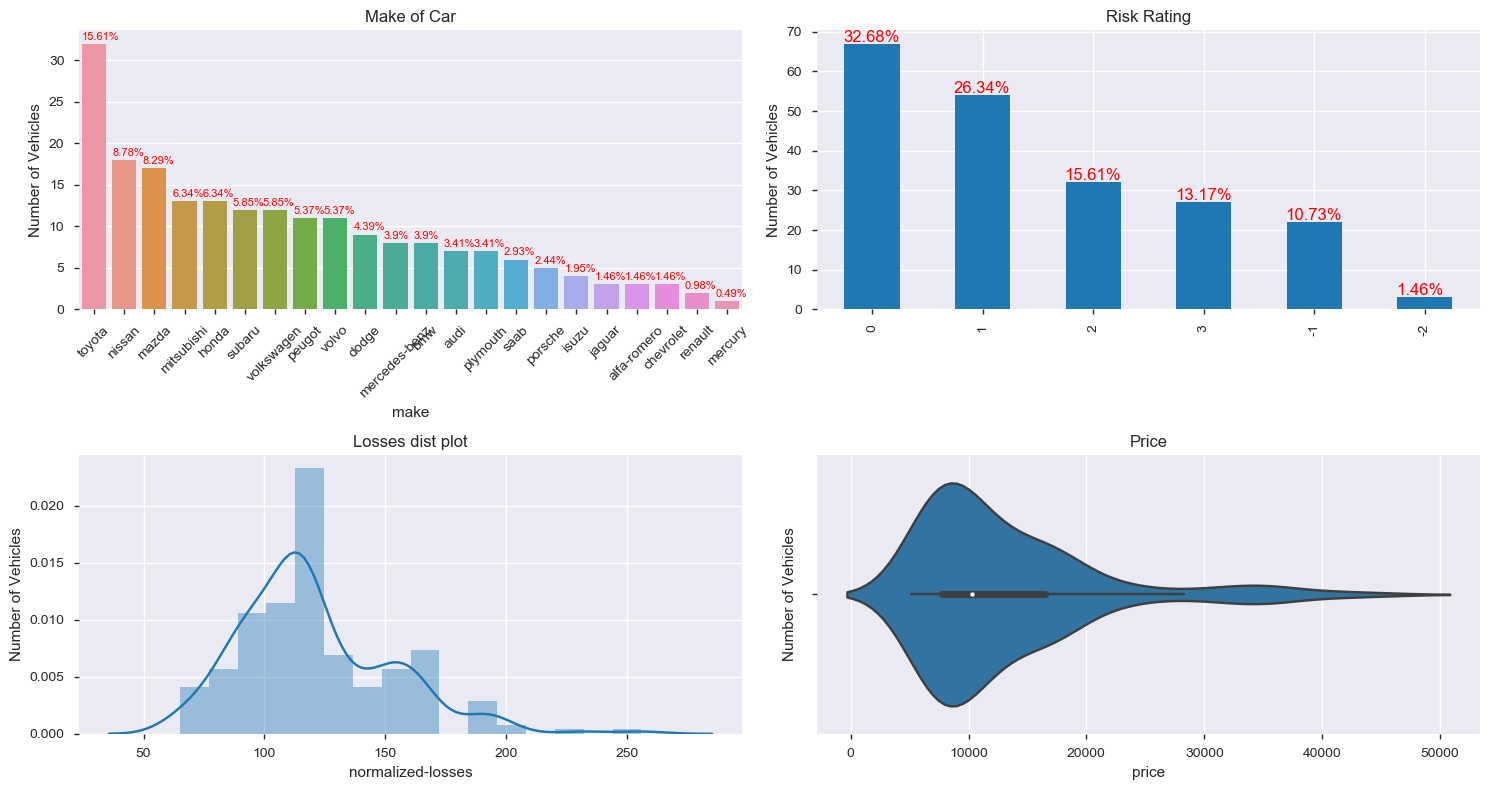

In [24]:
def text_on_bars(ax,total,adjust,fsize):
    totals = total
    for i in ax.patches:                                            # find the values and append to list
        totals.append(i.get_height())
    total = sum(totals)                                             # set individual bar lables using above list

    for i in ax.patches:                                            # set individual bar lables using above list
        ax.text(i.get_x()+adjust, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=fsize,
                color='red')                                        # get_x pulls left or right; get_height pushes up or down
plt.figure(1)
width = 15
height = 8
plt.subplot(221)
ax = sns.countplot('make', data=automobile_data, order = automobile_data['make'].value_counts().index)
text_on_bars(ax,[],0,8) #ax,  total,  adjust,  fsize
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Make of Car')
ax.set_ylabel('Number of Vehicles')

plt.subplot(222)
ax = automobile_data['symboling'].value_counts(normalize=False).plot(figsize=(width,height), kind='bar')
text_on_bars(ax,[],-0.01,12) #ax,  total,  adjust,  fsize                               
plt.title("Risk Rating")
plt.ylabel('Number of Vehicles')

plt.subplot(223)
# automobile_data['normalized-losses'].plot(figsize=(width,height), kind='line',color='teal',linestyle='solid')
sns.distplot(automobile_data["normalized-losses"])
plt.title("Losses dist plot")
plt.ylabel('Number of Vehicles')

plt.subplot(224)
# automobile_data['price'].plot(kind='line',figsize=(width-5,height-5), colormap='rainbow')
sns.violinplot(automobile_data["price"])
plt.title("Price")
plt.ylabel('Number of Vehicles')


plt.tight_layout()
plt.savefig('6.2.1 Basic Info of the Vehicle.jpg', dpi=300, bbox_inches='tight')
plt.show()

<h4>Observations:</h4>

We have taken some key features of the automobile dataset for this analysis and below are our findings.
<ul>
    <li>Toyota is the make of the car which has <b>most number of vehicles</b> with more than 40% than the 2nd highest is Nissan.</li>
    <li><b>Insurance risk rating</b> have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.</li>
    <li><b>Normalized losses</b> which is the average loss payment per insured vehicle per year has more number of cars in the range between 175 and 200.</li>
    <li>The violin plot shows an outlier on the higher value side.</li>
    <li>Most of the cars has the <b>price</b> of $20k and less.</li>
</ul>

<a id=section622></a>
#### 6.2.2. Engine Specifications

Engine specifications includes **engine type, engine size** and it's **location**, **no.of cylinders** and **compression ratio**,  **fuel sytem** it uses and **horsepower** it produces. 

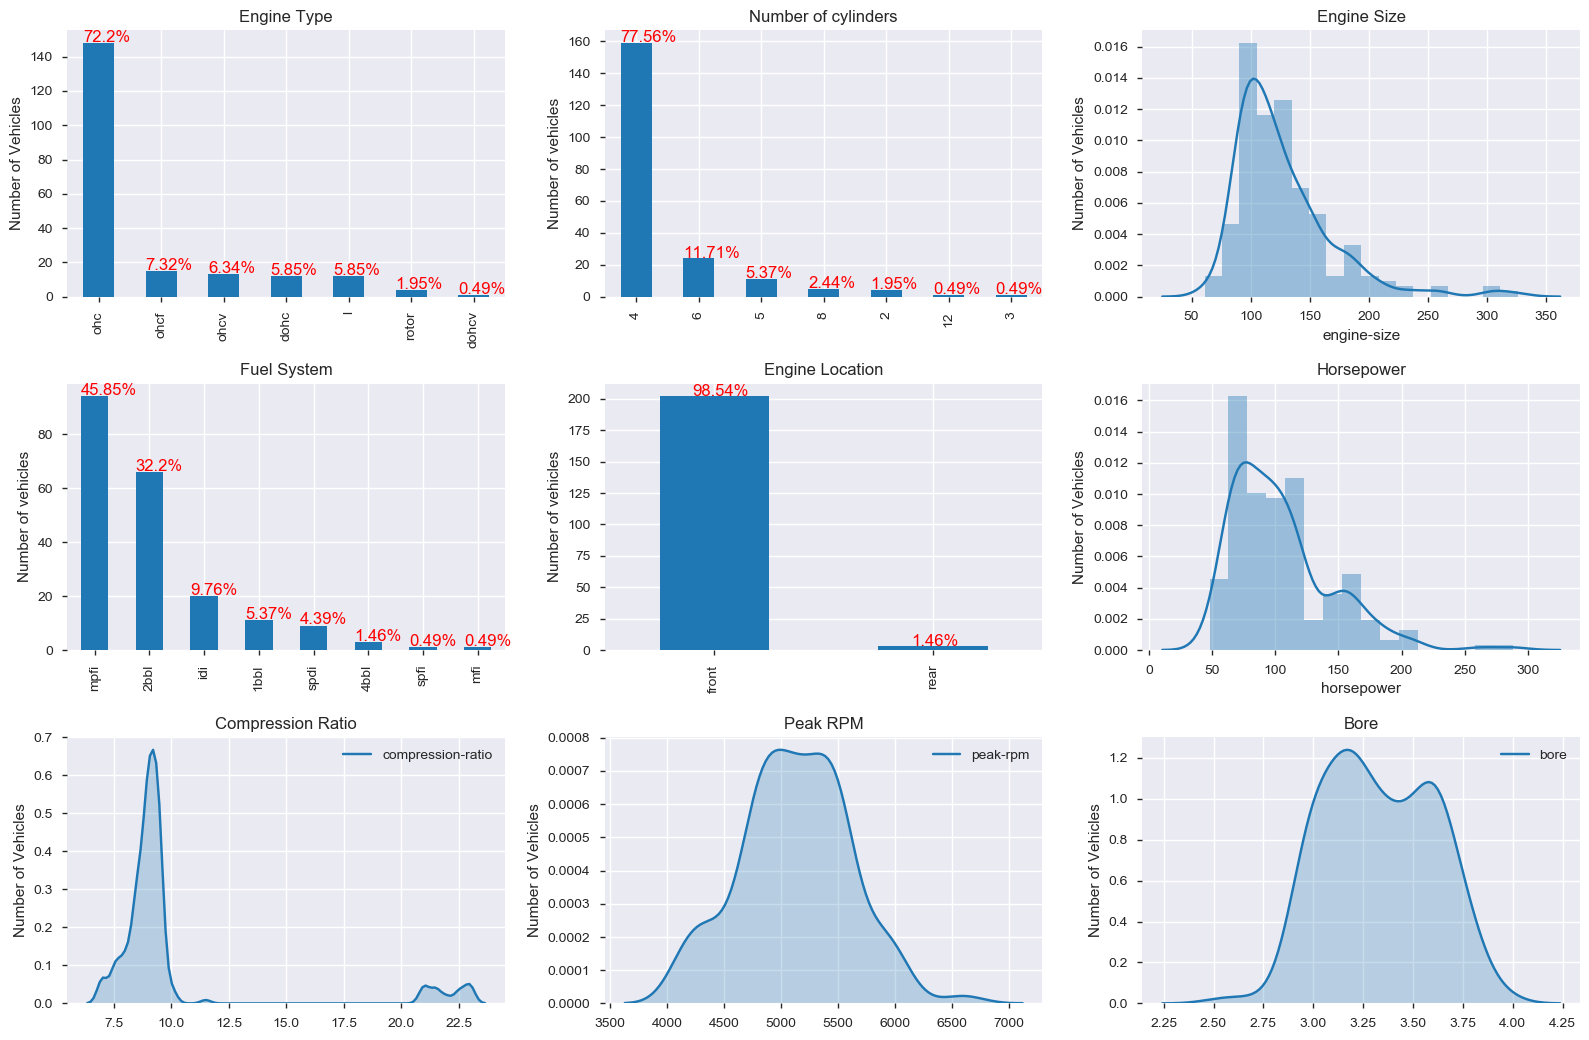

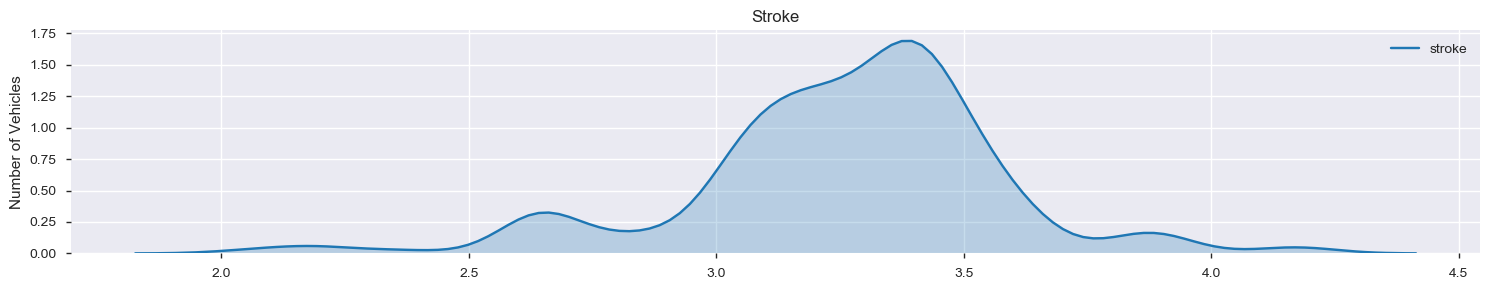

In [25]:
#engine parameters
plt.figure(1)
width = 16
height = 10.5
plt.subplot(331)
ax = automobile_data['engine-type'].value_counts(normalize=False).plot(figsize=(width, height),kind='bar')
text_on_bars(ax,[],0,12) #ax,  total,  adjust,  fsize
plt.title("Engine Type")
plt.ylabel('Number of Vehicles')

plt.subplot(332)
ax = automobile_data['num-of-cylinders'].value_counts(normalize=False).plot(figsize=(width, height),kind='bar')
text_on_bars(ax,[],0,12) #ax,  total,  adjust,  fsize
plt.title("Number of cylinders")
plt.ylabel('Number of vehicles')

plt.subplot(333)
ax = sns.distplot(automobile_data['engine-size'], kde=True, hist=True)
ax.set_title('Engine Size')
ax.set_ylabel('Number of Vehicles')

plt.subplot(334)
ax = automobile_data['fuel-system'].value_counts(normalize=False).plot(figsize=(width, height),kind='bar')
text_on_bars(ax,[],0,12) #ax,  total,  adjust,  fsize
plt.title("Fuel System")
plt.ylabel('Number of vehicles')

plt.subplot(335)
ax = automobile_data['engine-location'].value_counts(normalize= False).plot(figsize=(width, height),kind='bar')
text_on_bars(ax,[],0.15,12) #ax,  total,  adjust,  fsize
plt.title("Engine Location")
plt.ylabel('Number of vehicles')

plt.subplot(336)
ax = sns.distplot(automobile_data['horsepower'], kde=True, hist=True)
ax.set_title('Horsepower')
ax.set_ylabel('Number of Vehicles')

plt.subplot(337)
ax = sns.kdeplot(automobile_data['compression-ratio'], shade=True)
ax.set_title('Compression Ratio')
ax.set_ylabel('Number of Vehicles')

plt.subplot(338)
ax = sns.kdeplot(automobile_data['peak-rpm'], shade=True)
ax.set_title('Peak RPM')
ax.set_ylabel('Number of Vehicles')

plt.subplot(339)
ax = sns.kdeplot(automobile_data['bore'], shade=True)
ax.set_title('Bore')
ax.set_ylabel('Number of Vehicles')
plt.tight_layout()
plt.savefig('6.2.2. Engine Specifications1.jpg', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15,3))
plt.subplot(111)
ax = sns.kdeplot(automobile_data['stroke'], shade=True)
ax.set_title('Stroke')
ax.set_ylabel('Number of Vehicles')

plt.tight_layout()
plt.savefig('6.2.2. Engine Specifications2.jpg', dpi=300, bbox_inches='tight')
plt.show()

<h4>Observations:</h4>
<ul>
<li>Most cars has the following Engine parameters ranges:</li>
    <ul>
        <li>Engine Type        -     Ohc</li>
        <li>No. of cylinders   -     4</li>
        <li>Engine size        -     90 to 160 cc</li>
        <li>Fuel System        -     mpfi</li>
        <li>Engine Location    -     Front</li>
        <li>Horsepower         -     5o to 200 hp</li>
        <li>Compression Ratio  -     8:1 to 10:1</li>
        <li>Peak RPM           -     4500 to 6000 rpm</li>
        <li>Bore               -     2.75 to 4 inch</li>
        <li>Stroke             -     2 to 4 inch</li>
    </ul>
</ul>

<a id=section623></a>
#### 6.2.3. Vehicle Dimensions

Parameters which comprises vehicle dimensions are **curb-weight**, **wheel base**, **length**X**width**X**height**, **body style**, **no.of doors** it has, type of **wheel drive** it offers.

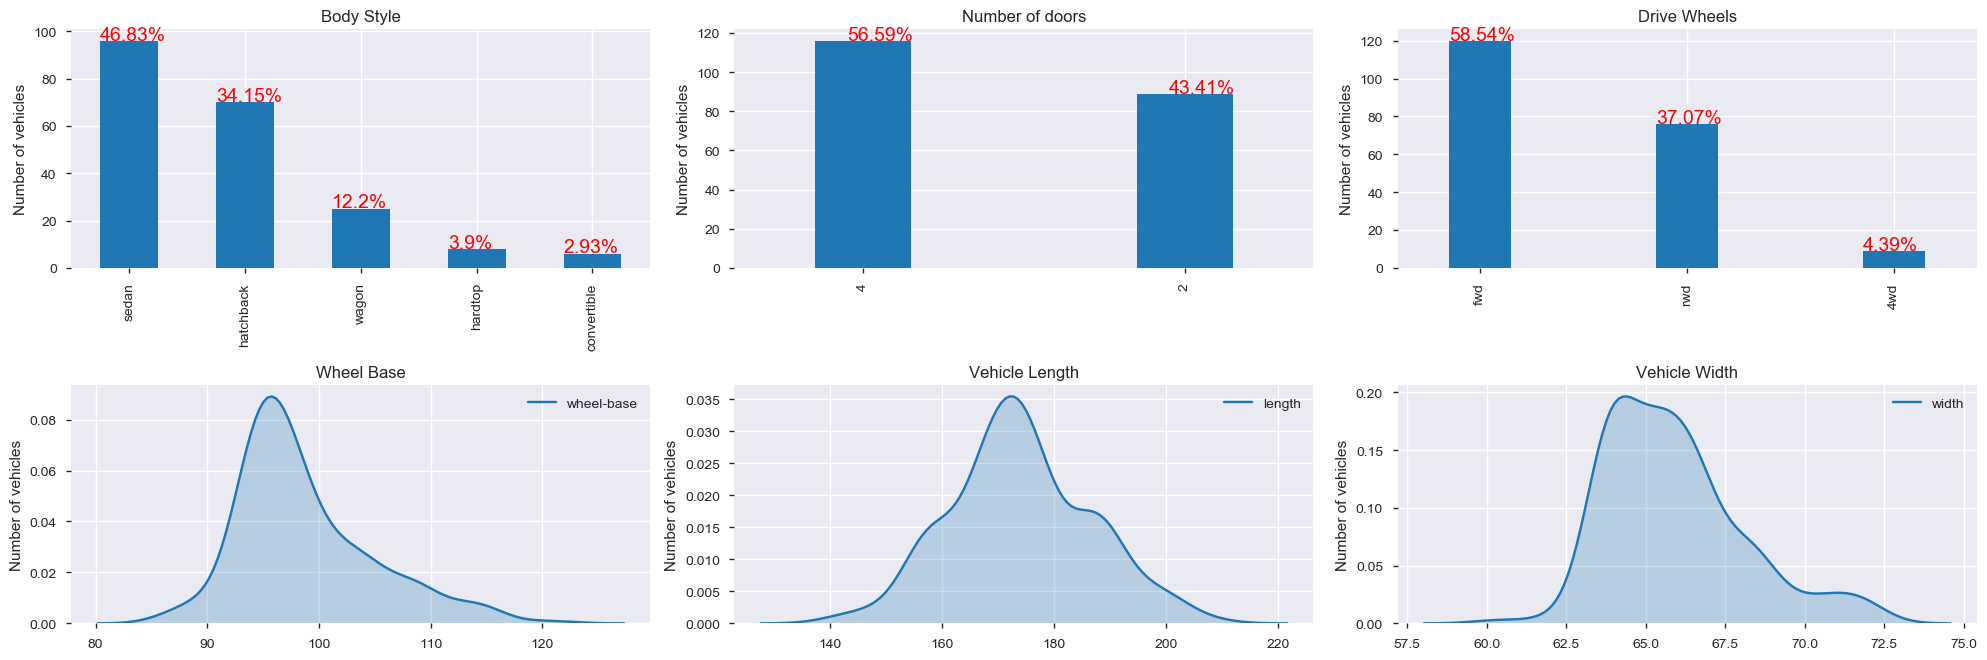

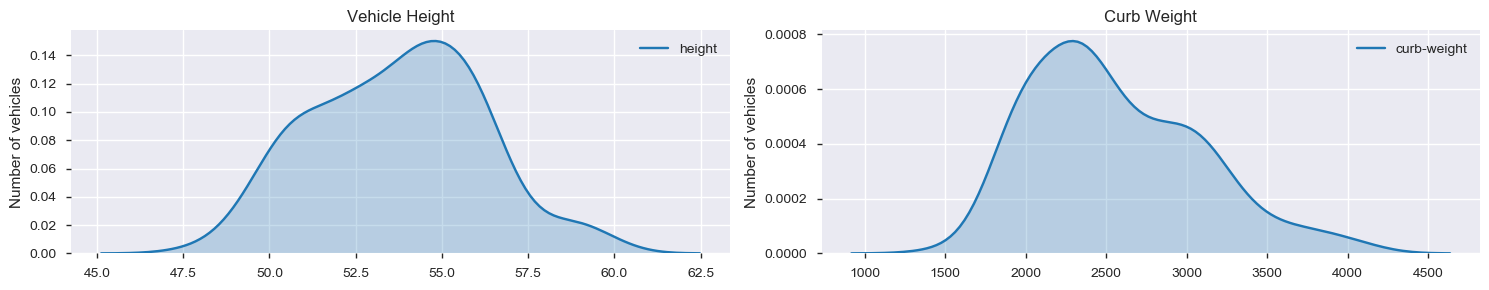

In [26]:
plt.figure(2)
totals = []
plt.subplot(331)
ax = automobile_data['body-style'].value_counts(normalize=False).plot(figsize=(20,10),kind='bar')
text_on_bars(ax,[],0,14) #ax,  total,  adjust,  fsize
plt.title("Body Style")
plt.ylabel('Number of vehicles')

plt.subplot(332)
ax = automobile_data['num-of-doors'].value_counts(normalize=False).plot(kind='bar',width=0.3)
text_on_bars(ax,[],0.1,14) #ax,  total,  adjust,  fsize
plt.title("Number of doors")
plt.ylabel('Number of vehicles')

plt.subplot(333)
ax = automobile_data['drive-wheels'].value_counts(normalize=False).plot(figsize=(20,10),kind='bar',width=0.3)
text_on_bars(ax,[],0,14) #ax,  total,  adjust,  fsize
plt.title("Drive Wheels")
plt.ylabel('Number of vehicles')

plt.subplot(334)
ax = sns.kdeplot(automobile_data['wheel-base'], shade=True)
ax.set_title("Wheel Base")
ax.set_ylabel('Number of vehicles')

plt.subplot(335)
ax = sns.kdeplot(automobile_data['length'], shade=True)
ax.set_title("Vehicle Length")
ax.set_ylabel('Number of vehicles')

plt.subplot(336)
ax = sns.kdeplot(automobile_data['width'], shade=True)
ax.set_title("Vehicle Width")
ax.set_ylabel('Number of vehicles')
plt.tight_layout()
plt.savefig('6.2.3. Vehicle Dimensions1.jpg', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15,3))
plt.subplot(121)
ax = sns.kdeplot(automobile_data['height'], shade=True)
ax.set_title("Vehicle Height")
ax.set_ylabel('Number of vehicles')

plt.subplot(122)
ax = sns.kdeplot(automobile_data['curb-weight'], shade=True)
ax.set_title("Curb Weight")
ax.set_ylabel('Number of vehicles')

plt.tight_layout()
plt.savefig('6.2.3. Vehicle Dimensions2.jpg', dpi=300, bbox_inches='tight')
plt.show()

<h4>Observations:</h4>
<ul>
    <li><b>Sedan</b> type cars having <b>4</b> doors with <b>forward wheel drive</b> has the majority share in the market.</li>
    <li>For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are <b>very less</b> number of cars for four wheel drive.</li>
    <li>Most cars has the following Vehicle dimensions:</li>
    <ul>
        <li>Wheel base     -     90 to 110 inch</li>
        <li>Vehicle length -     150 to 200 inch</li>
        <li>Vehicle width  -     62.5 to 70 inch</li>
        <li>Vehicle Height -     48.0 to 60 inch</li>
        <li>Curb Weight    -     1.5 to 3.5 tonnes</li>
    </ul>
</ul>

<a id=section624></a>
#### 6.2.4. Fuel & Efficiency

It includes **type of the fuel**, **aspiration** and **mileage** it offers in the city and the highway.

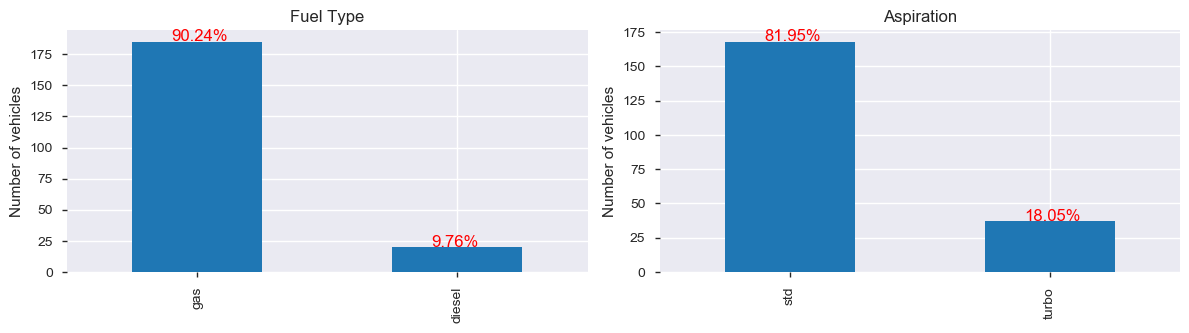

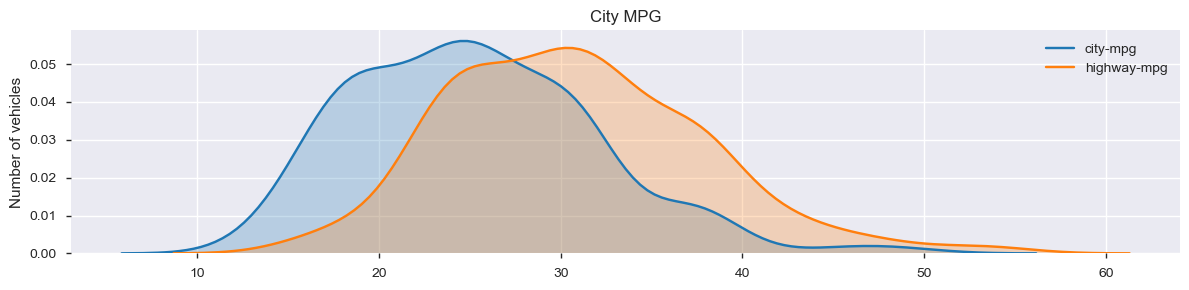

In [27]:
plt.figure(3)
width = 12
height = 6
plt.subplot(221)

ax = automobile_data['fuel-type'].value_counts(normalize=False).plot(figsize=(width, height),kind='bar')
text_on_bars(ax,[],0.15,12) #ax,  total,  adjust,  fsize
plt.title("Fuel Type")
plt.ylabel('Number of vehicles')

plt.subplot(222)
ax = automobile_data['aspiration'].value_counts(normalize=False).plot(figsize=(width, height),kind='bar')
text_on_bars(ax,[],0.15,12) #ax,  total,  adjust,  fsize
plt.title("Aspiration")
plt.ylabel('Number of vehicles')
plt.tight_layout()
plt.savefig('6.2.4. Fuel & Efficiency1.jpg', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,3))
plt.subplot(111)
ax = sns.kdeplot(automobile_data['city-mpg'], shade=True)
ax = sns.kdeplot(automobile_data['highway-mpg'], shade=True)
ax.set_title("City MPG")
ax.set_ylabel('Number of vehicles')

plt.tight_layout()
plt.savefig('6.2.4. Fuel & Efficiency2.jpg', dpi=300, bbox_inches='tight')
plt.show()

<h4>Observations:</h4>
<ul>
    <li>Most preferred <b>fuel type</b> by the customers is <b>gas</b> and the <b>aspiration type</b> is <b>standard</b> against trubo having more than 80% of the choice.</li>
    <li>Highway mileage is more than the city mileage for all the vehicles</li>
</ul>

<a id=section63></a>
### 6.3. Multivariate Analysis

<a id=section631></a>
#### 6.3.1. Analysis based on price

<a id=section6311></a>
##### 6.3.1.1. Price vs Continuous Attributes:

Continuous attributes are those which has numerical values.

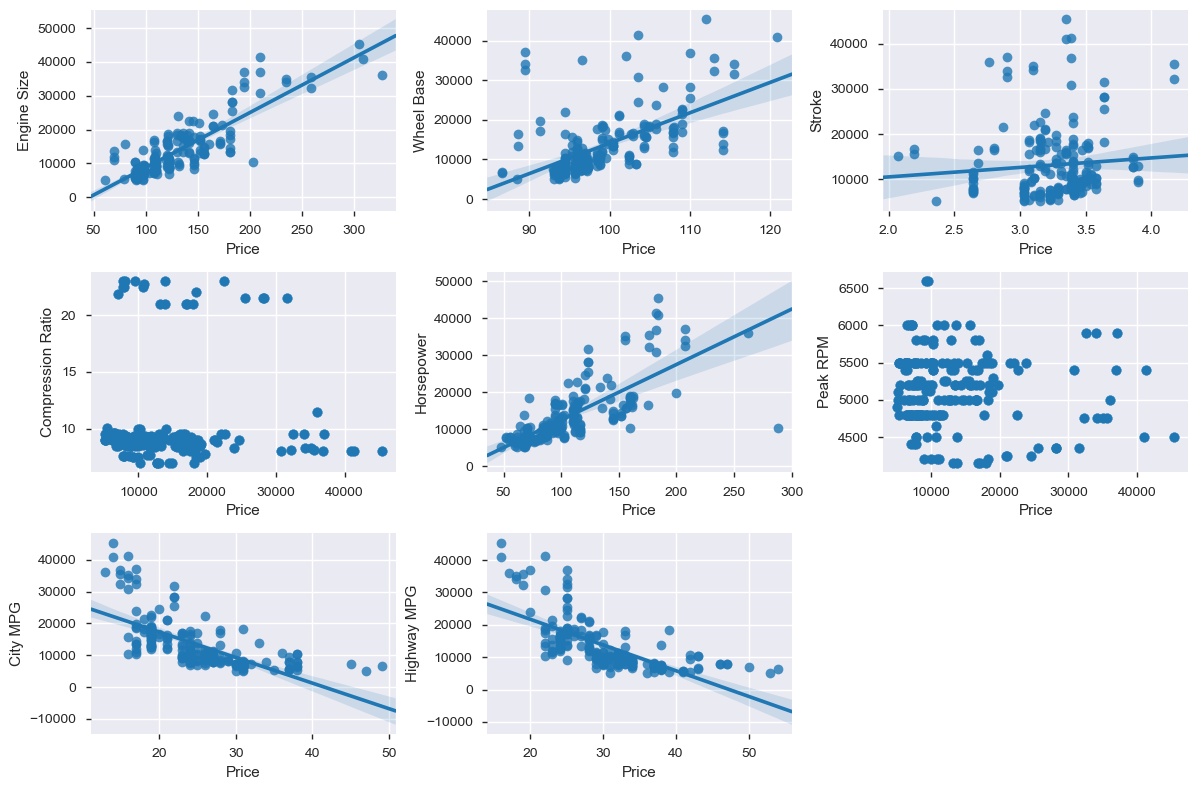

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
ax = sns.regplot(x='engine-size', y='price', data=automobile_data)
ax.set_ylabel("Engine Size")
ax.set_xlabel("Price")

plt.subplot(3,3,2)
ax = sns.regplot(x='wheel-base', y='price', data=automobile_data)
plt.xlabel("Price")
plt.ylabel("Wheel Base")

plt.subplot(3,3,3)
ax = sns.regplot(x='stroke', y='price', data=automobile_data)
plt.xlabel("Price")
plt.ylabel("Stroke")

plt.subplot(3,3,4)
plt.scatter(automobile_data['price'],automobile_data['compression-ratio'])
plt.xlabel("Price")
plt.ylabel("Compression Ratio")

plt.subplot(3,3,5)
ax = sns.regplot(x='horsepower', y='price', data=automobile_data)
plt.xlabel("Price")
plt.ylabel("Horsepower")

plt.subplot(3,3,6)
plt.scatter(automobile_data['price'],automobile_data['peak-rpm'])
plt.xlabel("Price")
plt.ylabel("Peak RPM")

plt.subplot(3,3,7)
ax = sns.regplot(x='city-mpg', y='price', data=automobile_data)
plt.xlabel("Price")
plt.ylabel("City MPG")

plt.subplot(3,3,8)
ax = sns.regplot(x='highway-mpg', y='price', data=automobile_data)
plt.xlabel("Price")
plt.ylabel("Highway MPG")
plt.tight_layout()
plt.savefig('6.3.1.1. Price vs Continuous Attributes.jpg', dpi=300, bbox_inches='tight')
plt.show()

**Observations:**

- Price **increases** with the **increase** in engine size, wheel base, Horsepower.

- **Engine size is directly proportional to price** of the vehicle. As the size of the engine increases the price also increases. Most of the vehicles are in the **price range** of 20k USD and most of the vehicles has **engine sizes** of upto 200 cc.

- Vehicle with high price have low mileage.This because high priced vehicles go into luxary segment which are meant for speed, high performance and running cost is not very important in this segment.

- Engine-size, horsepower and mileage are having **high correlation with price**.

- Fuel Efficiency has a **negative correlation** with price. People who look for highly fuel efficient car will normally be budget conscious. Hence it is probable that those cars are made for lower price brackets.


<br></br>

<a id=section6312></a>
##### 6.3.1.2. Price vs categorical Attributes:

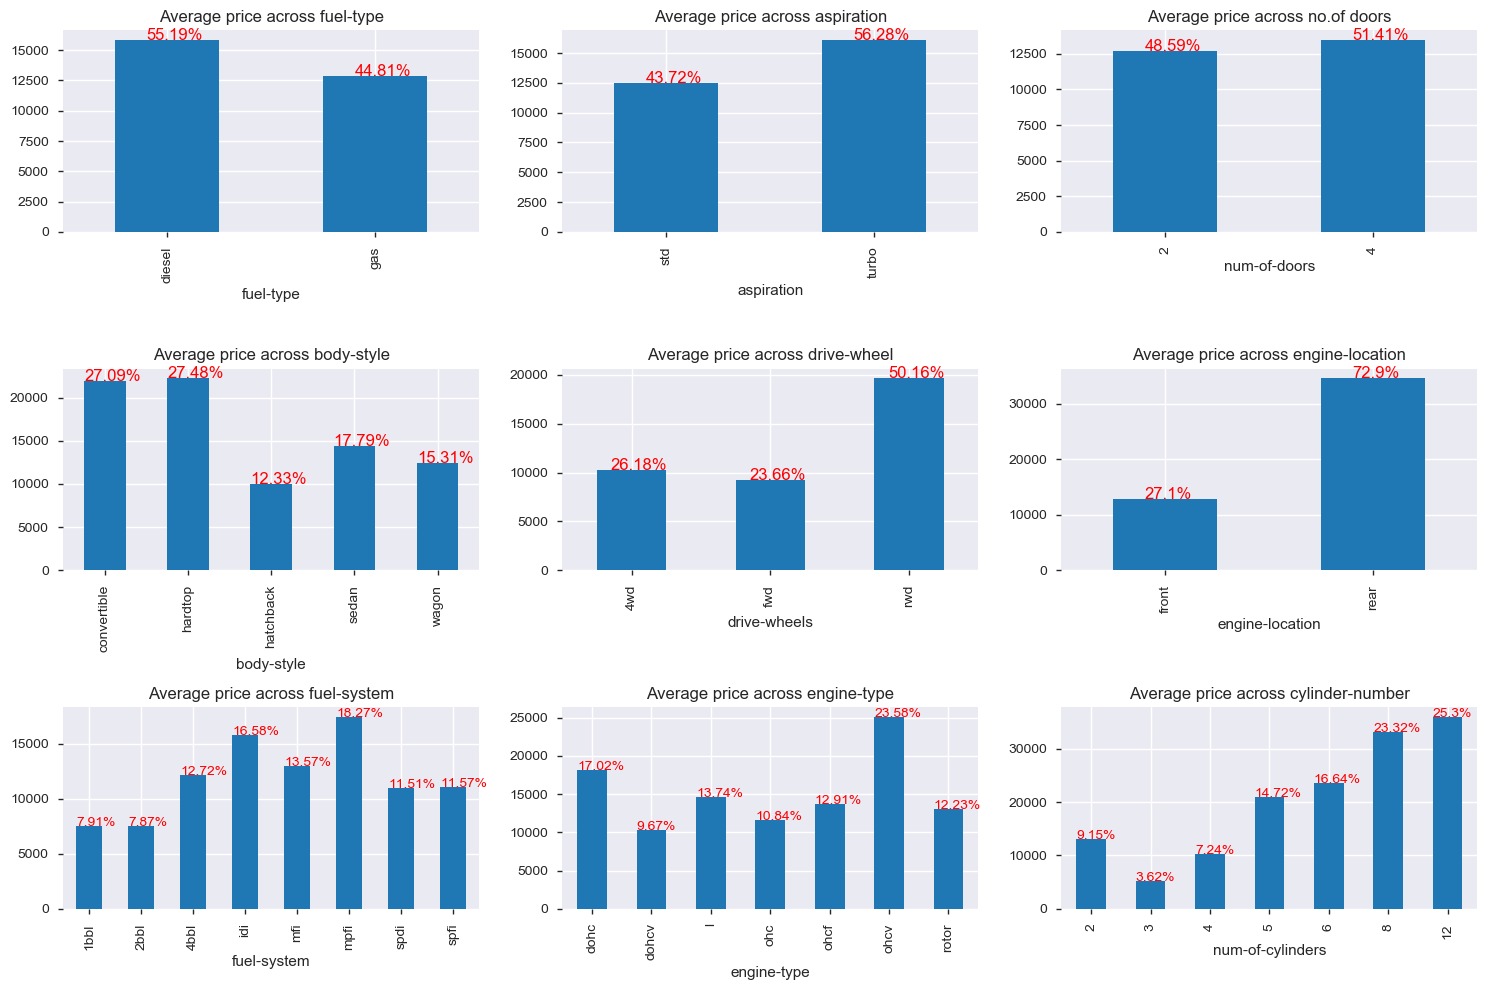

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
ax = automobile_data.groupby('fuel-type')['price'].mean().plot(kind='bar')
text_on_bars(ax,[],0.15,12) #ax,  total,  adjust,  fsize
plt.title("Average price across fuel-type")

plt.subplot(3,3,2)
ax = automobile_data.groupby('aspiration')['price'].mean().plot(kind='bar')
text_on_bars(ax,[],0.15,12) #ax,  total,  adjust,  fsize
plt.title("Average price across aspiration")

plt.subplot(3,3,3)
ax = automobile_data.groupby('num-of-doors')['price'].mean().plot(kind='bar')
text_on_bars(ax,[],0.15,12) #ax,  total,  adjust,  fsize
plt.title("Average price across no.of doors")

plt.subplot(3,3,4)
ax = automobile_data.groupby('body-style')['price'].mean().plot(kind='bar')
text_on_bars(ax,[],0,12) #ax,  total,  adjust,  fsize
plt.title("Average price across body-style")

plt.subplot(3,3,5)
ax = automobile_data.groupby('drive-wheels')['price'].mean().plot(kind='bar')
text_on_bars(ax,[],0.1,12) #ax,  total,  adjust,  fsize
plt.title("Average price across drive-wheel")

plt.subplot(3,3,6)
ax = automobile_data.groupby('engine-location')['price'].mean().plot(kind='bar')
text_on_bars(ax,[],0.15,12) #ax,  total,  adjust,  fsize
plt.title("Average price across engine-location")

plt.subplot(3,3,7)
ax = automobile_data.groupby('fuel-system')['price'].mean().plot(kind='bar')
text_on_bars(ax,[],0,10) #ax,  total,  adjust,  fsize
plt.title("Average price across fuel-system")

plt.subplot(3,3,8)
ax = automobile_data.groupby('engine-type')['price'].mean().plot(kind='bar')
text_on_bars(ax,[],0,10) #ax,  total,  adjust,  fsize
plt.title("Average price across engine-type")

plt.subplot(3,3,9)
ax = automobile_data.groupby('num-of-cylinders')['price'].mean().plot(kind='bar')
text_on_bars(ax,[],0,10) #ax,  total,  adjust,  fsize
plt.title("Average price across cylinder-number")
plt.tight_layout()
plt.savefig('6.3.1.2. Price vs categorical Attributes.jpg', dpi=300, bbox_inches='tight')
plt.show()

<h4>Observations:</h4>

<ul>
    <li>Price is more for diesel type. That's why if we see section 6.2.4. Fuel & Efficiency, there most people opted for gas. Same is the case with aspiration, engine location and engine type.</li>
    <li>Even though the hatchback cost is less, most people are going for sedan vehicles.</li>
    <li>Rear wheel drive type cars are the most expensive. </li>
    <li>Even though the price of mpfi engine is more, people are going for it because of the following reasons.</li>
    <ul>
        <li>Engine vibrations from MPFI equipped engines are very less, hence the life of MPFI system equipped engines is high.</li>
        <li>This system is very responsive in case of sudden acceleration or deceleration.</li>
        <li>Lower fuel consumption leads to better mileage. The volumetric efficiency of MPFI is high.</li>
    </ul>
</ul>

<a id=section6313></a>
##### 6.3.1.3. What is the price of cars by body style and drive wheels type

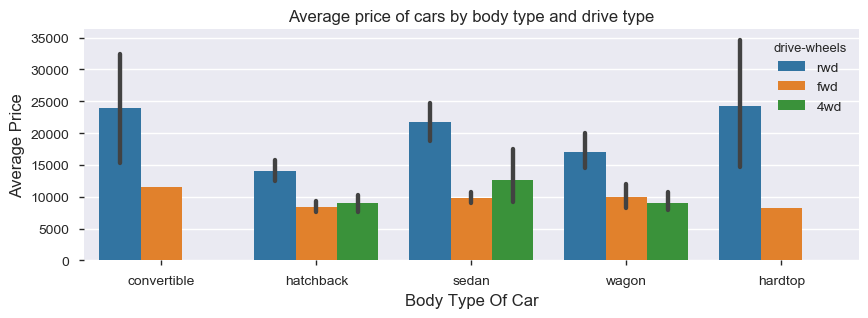

In [30]:
fig, ax = plt.subplots(figsize=(10,3))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="body-style", y="price",hue="drive-wheels", data=automobile_data)
ax.set_title("Average price of cars by body type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Body Type Of Car",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.savefig('6.3.1.3. What is the price of cars by body style and drive wheels type.jpg', dpi=300, bbox_inches='tight')
plt.show()

By this chart we can say that the price is more for rear wheel drive type for all body types.
<br></br>
<br></br>

<a id=section6314></a>
##### 6.3.1.4. What is the price of cars by engine type and drive wheels type

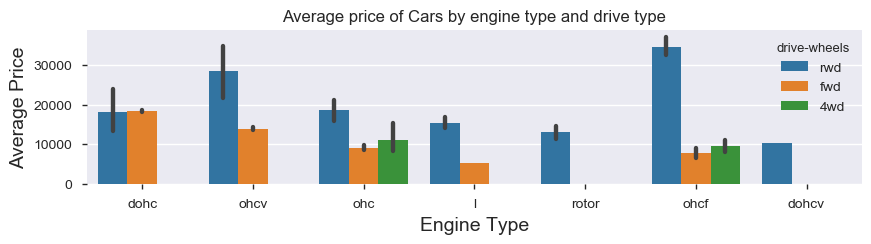

In [31]:
fig, ax = plt.subplots(figsize=(10,2))
colors = ["#00e600", "#ff8c1a","#a180cc"]
ax = sns.barplot(x="engine-type", y="price",hue="drive-wheels", data=automobile_data)
ax.set_title("Average price of Cars by engine type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Engine Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.savefig('6.3.1.4. What is the price of cars by engine type and drive wheels type.jpg', dpi=300, bbox_inches='tight')
plt.show()

<a id=section6315></a>
##### 6.3.1.5. Which price segment cars sold the most ?

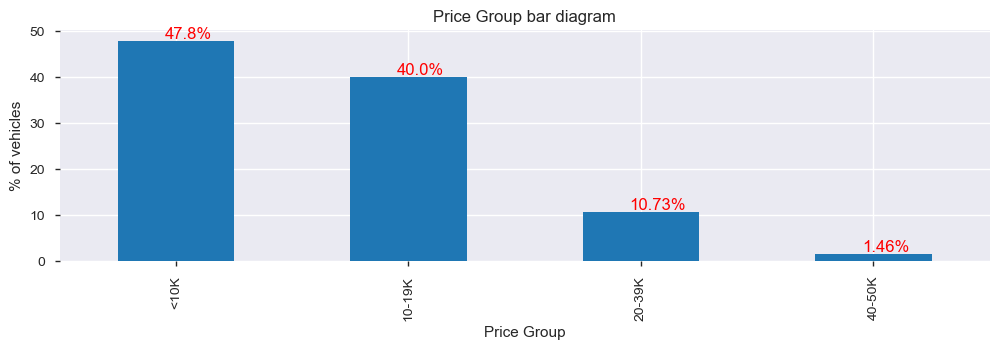

In [32]:
automobile_data['price_group'] = pd.cut(automobile_data['price'],[0,10000,20000,40000,60000], 
                                labels = ['<10K','10-19K','20-39K','40-50K'], include_lowest = True)
automobile_data['price_group'] = automobile_data['price_group'].astype(object)
ax=(automobile_data['price_group'].value_counts() / len(automobile_data) *100).plot.bar(figsize=(12,3))
text_on_bars(ax,[],0.2,12) #ax,  total,  adjust,  fsize
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');
plt.savefig('6.3.1.5. Which price segment cars sold the most.jpg', dpi=300, bbox_inches='tight')

By this chart we can say that **47.8%** of cars sold in the price range of less than or equal to **$ 10K USD**

<a id=section6316></a>
##### 6.3.1.6. What are the price variations accross different brands?

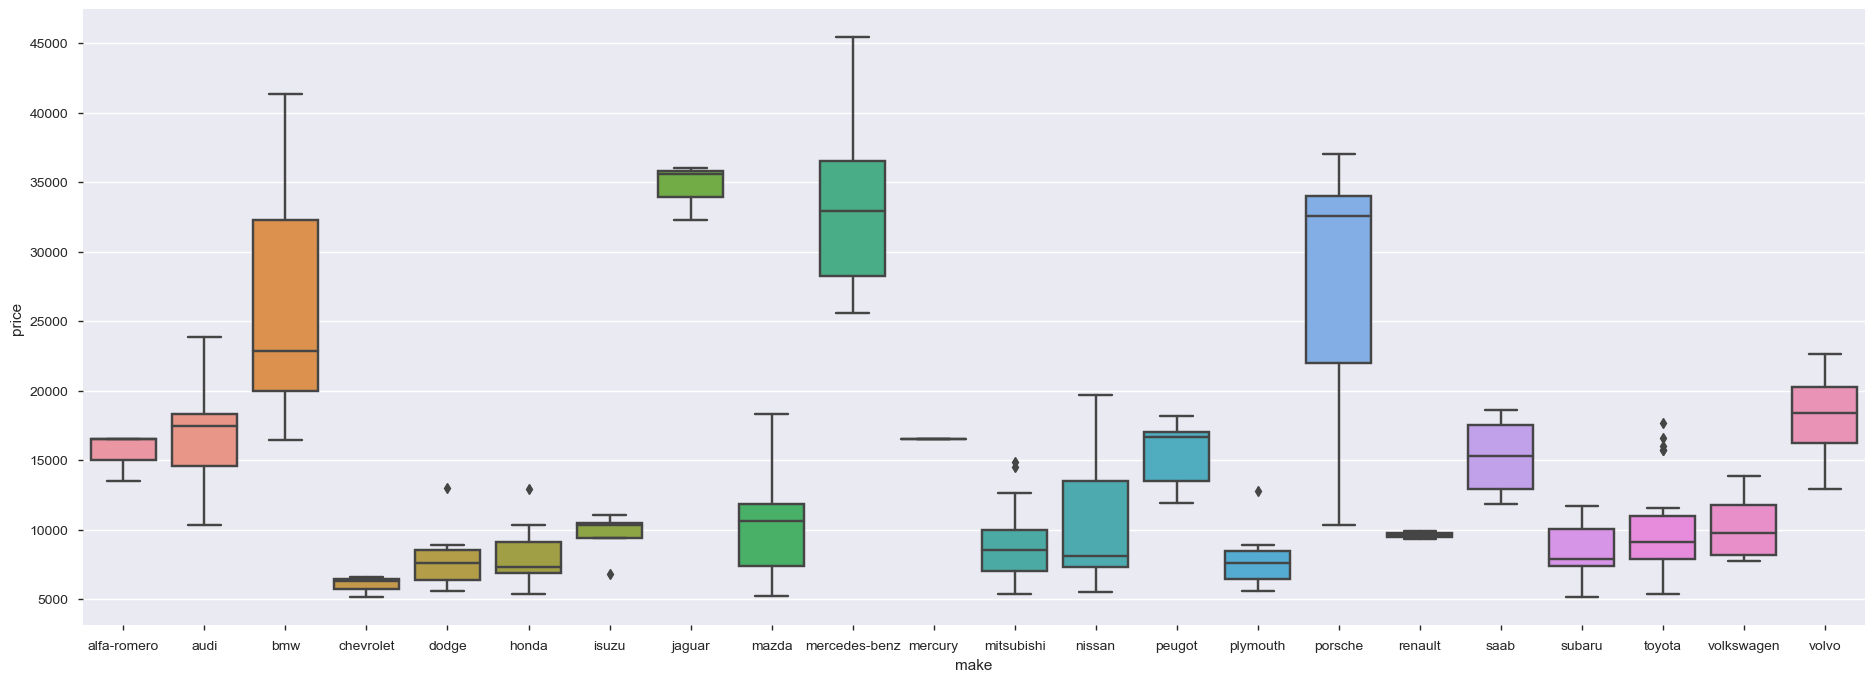

In [33]:
plt.rcParams['figure.figsize']=(23,8)
ax = sns.boxplot(x="make", y="price", data=automobile_data)
plt.savefig('6.3.1.6. What are the price variations accross different brands.jpg', dpi=300, bbox_inches='tight')

**Observations:**

- The **most expensive car** is manufactured by **Mercedes benz** and the **least expensive car** is manufactured by **Chevrolet.**

- The **premium** cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche.

- **Less expensive** cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru.

- Rest of the cars are in the **midrange** between 10000 and 20000 which has the highest number of cars.

<a id=section6317></a>
##### 6.3.1.7. which type of drive wheel is most valuable?


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [34]:
expensive_drive_wheels = automobile_data[['drive-wheels','body-style','price']]
expensive_drive_wheels_avg = expensive_drive_wheels.groupby(['drive-wheels','body-style'],as_index=False).mean()
pivot_table = expensive_drive_wheels_avg.pivot_table(index='drive-wheels',columns='body-style')

For the sake of simplicity, we'll fill these NaN values with zeros.

In [35]:
pivot_table = pivot_table.fillna(0)
pivot_table

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd           0.0         0.000000      8949.000000   12647.333333   
fwd           11595.0     8249.000000   8396.387755   9828.754386    
rwd           23949.6     24202.714286  14125.000000  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd           9095.750000   
fwd           9997.333333   
rwd           16994.222222

Now it is more compelling to read, as we want **rear wheel drive is the most valuable with hardtop body** model car and it would price an average of **24203 USD**.

<a id=section6318></a>
#### 6.3.1.8. what is the correlation between drive-wheels and body-style as per the price

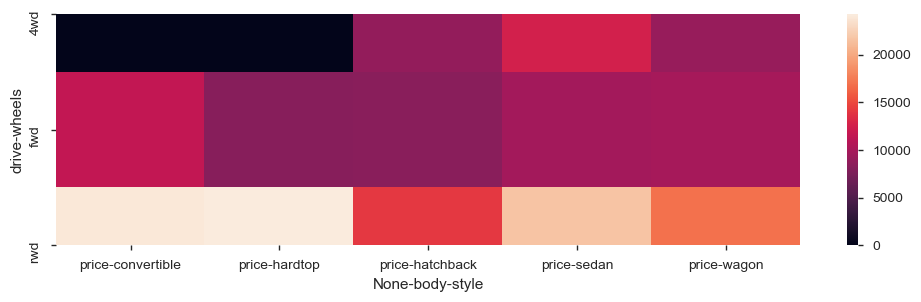

In [36]:
plt.figure(figsize=(12,3))
sns.heatmap(pivot_table)
plt.savefig('6.3.1.8. what is the correlation between drive-wheels and body-style as per the price.jpg', dpi=300, bbox_inches='tight')

From the above heat map also we can see that, rear wheel drive with hardtop is the most expensive vehicle.

<a id=section6319></a>
##### 6.3.1.9. How the price is distributed among different body sizes?

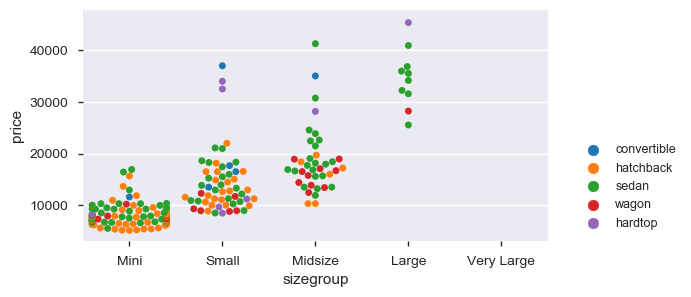

In [37]:
automobile_data['shadowarea'] = (automobile_data['length']*automobile_data['width']/144).round(2) #Length x Width of ehicle conerted to sq.ft.
def make_size_groups(x):
    if (x[0] > 1400 and x[0] < 2000):
        if(x[1] < 70.0): return 'Mini'
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Mini'
        if(x[1] >= 81.0 and x[1] <= 110.0): return 'Small'
        if(x[1] > 110 ): return 'Midsize'
        
    if (x[0] > 2000 and x[0] < 2501):
        if(x[1] < 70.0): return 'Mini'
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Mini'
        if(x[1] >= 81.0 and x[1] <= 110.0): return 'Small'
        if(x[1] > 110 ): return 'Midsize'
    if(x[0] > 2500 and x[0] < 3001):
        if(x[1] >= 70.0 and x[1] <= 90.0): return 'Small'
        if(x[1] > 90.0 ): return 'Midsize'
    if(x[0] > 3001 and x[0] < 3500):
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Small'
        if(x[1] > 80.0 and x[1] <= 100.0): return 'Midsize'
        if(x[1] > 100 ): return 'Large'
    if(x[0] > 3500 and x[0] < 4000):    
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Small'
        if(x[1] >= 81.0 and x[1] <= 90.0): return 'Midsize'
        if(x[1] >= 91.0 and x[1] <= 110.0): return 'Large'
        if(x[1] >= 110.0 ): return 'Very Large'
    if(x[0] > 4000 ):    
        if(x[1] >= 70.0 and x[1] <= 90.0): return 'Midsize'
        if(x[1] >= 91.0 and x[1] <= 100.0): return 'Large'
        if(x[1] >= 101.0 ): return 'Very Large'
        
automobile_data['sizegroup'] = automobile_data[['curb-weight', 'shadowarea']].apply(lambda x: make_size_groups(x), axis=1) 
plt.figure(figsize=(6,3))
sns.swarmplot("sizegroup",'price', data=automobile_data, hue="body-style", order=['Mini','Small','Midsize', 'Large', 'Very Large'])
plt.legend(bbox_to_anchor=(1.3, 0), loc='lower right', fontsize=9)
plt.savefig('6.3.1.9. How the price is distributed among different body sizes.jpg', dpi=300, bbox_inches='tight')

<a id=section63110></a>
##### 6.3.1.10. Continuous attributes of engine specifications and their variation in price

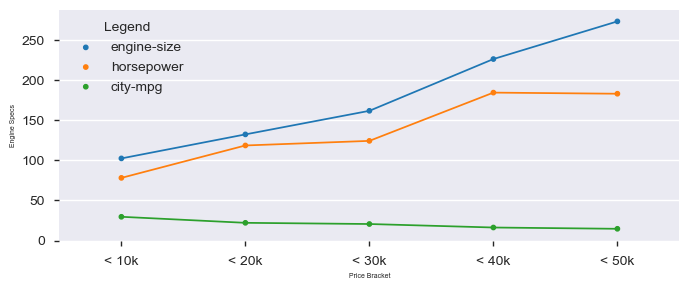

In [38]:
def price_category(x):
    if(x < 10000): return '< 10k'
    if(x < 20000): return '< 20k'
    if(x < 30000): return '< 30k'
    if(x < 40000): return '< 40k'
    if(x < 50000): return '< 50k'

automobile_data['pricebracket'] = automobile_data['price'].apply(lambda x: price_category(x))
enginesummary=automobile_data.groupby(by='pricebracket', as_index=False)['engine-size','horsepower','city-mpg'].mean()
enginesummary=enginesummary.melt('pricebracket', var_name='cols',  value_name='vals')

plt.figure(figsize=(8,3))
ax = sns.pointplot(x='pricebracket', y='vals', hue='cols',data=enginesummary, ci=95, scale = 0.4)
ax.set_ylabel('Engine Specs',fontsize=5 )
ax.set_xlabel('Price Bracket',fontsize=5)
ax.legend(loc="best",framealpha=0, title="Legend")
plt.savefig('6.3.1.10. Continuous attributes of engine specifications and their variation in price.jpg', dpi=300, bbox_inches='tight')

<a id=section632></a>
#### 6.3.2. Analysis based on normalized-losses

<a id=section6321></a>
#### 6.3.2.1. Which company has the highest normalised losses?

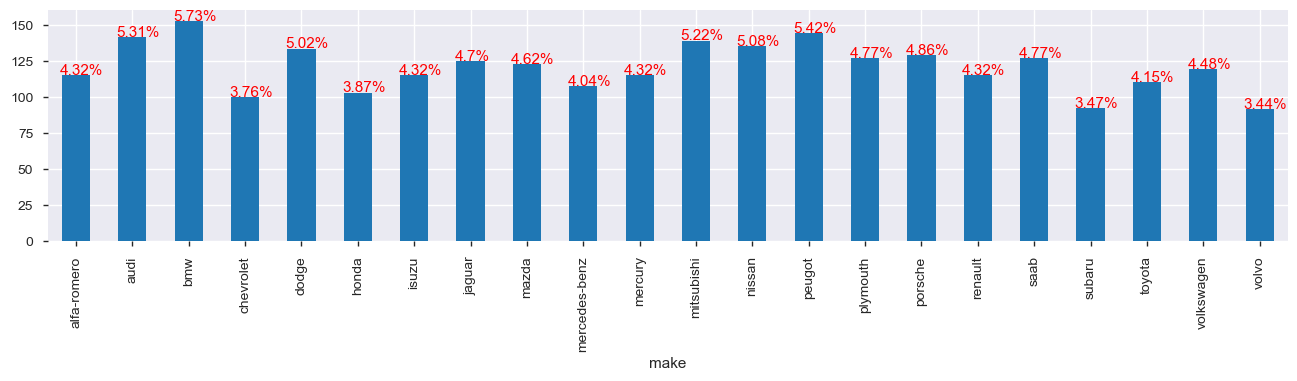

In [39]:
plt.figure(1)
ax = automobile_data.groupby('make')['normalized-losses'].mean().plot(kind='bar',figsize=(16,3))
text_on_bars(ax,[],-0.03,11) #ax,  total,  adjust,  fsize
plt.savefig('6.3.2.1. Which company has the highest normalised losses.jpg', dpi=300, bbox_inches='tight')

**BMW** has the highest number of normalized losses among all.

<a id=section6322></a>
##### 6.3.2.2. How Normalized losses are related to Risk Rating across different body-styles?

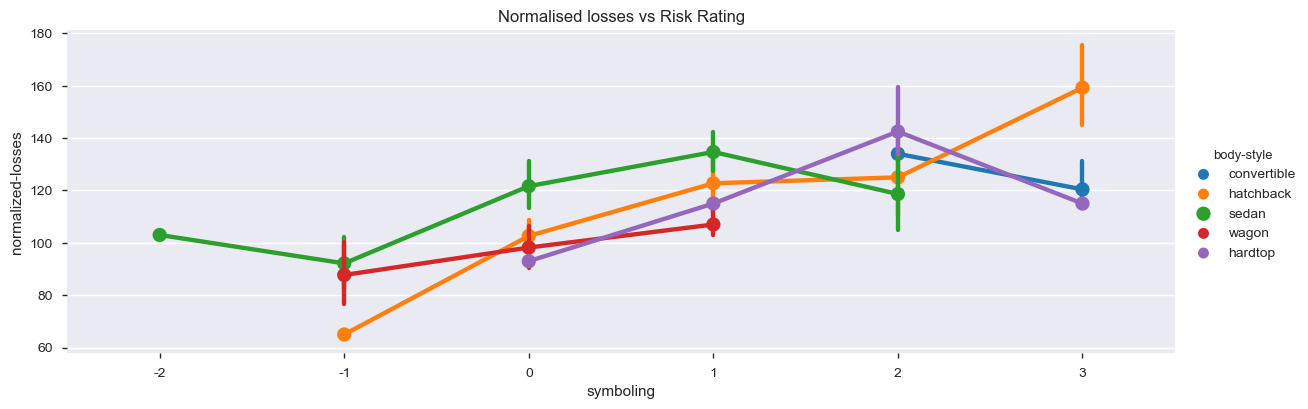

In [40]:
sns.catplot(data=automobile_data, y="normalized-losses", x="symboling" , hue="body-style" ,kind="point",height=4,aspect=3)
plt.title('Normalised losses vs Risk Rating')
plt.savefig('6.3.2.2. How Normalized losses are related to Risk Rating across different body-styles.jpg', dpi=300, bbox_inches='tight')

**Observations:**

- **Increase** in **risk rating** linearly **increases** in **normalised** losses in vehicle.
- covertible car and hardtop car has **more** losses with risk rating above 0.
- hatchback cars has **highest losses** with risk rating **3**.
- sedan and Wagon car has **losses** even **with less risk rating**.

<a id=section6323></a>
#### 6.3.2.3. What are the Normalized losses accross different body styles?

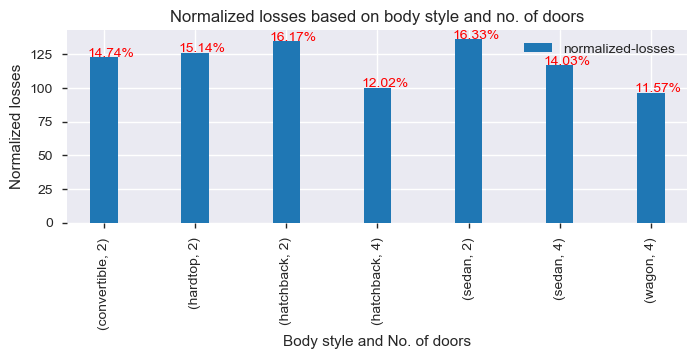

In [41]:
ax = pd.pivot_table(automobile_data,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',width=0.3,figsize=(8,2.5))
text_on_bars(ax,[],-0.03,10) #ax,  total,  adjust,  fsize
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');
plt.savefig('6.3.2.3. What are the Normalized losses accross different body styles.jpg', dpi=300, bbox_inches='tight')

<h4>Observations:</h4>

As we understand the normalized loss which is the average loss payment per insured vehicle is calculated with many features of the cars which includes body style and no. of doors. Normalized losses are distributed across different body style but the two door cars has more number of losses than the four door cars.

<a id=section633></a>
#### 6.3.3. Analysis based on fuel

<a id=section6331></a>
#### 6.3.3.1. Which Fuel-Type is giving better mileage in city & highway

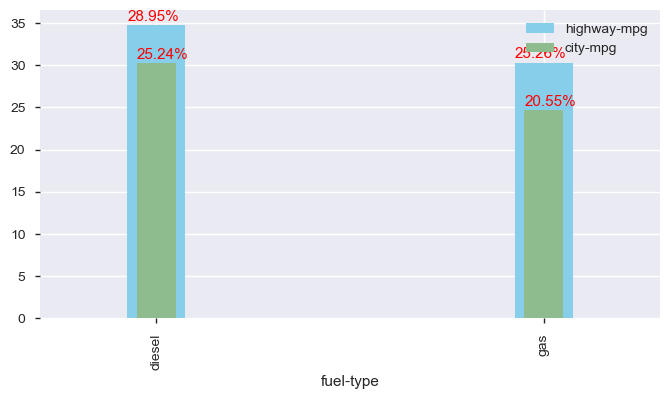

In [42]:
ax = automobile_data.groupby(['fuel-type'])['highway-mpg'].mean().plot(kind='bar',figsize=(8,4), color='SKYBLUE',width=0.15)

ax = automobile_data.groupby(['fuel-type'])['city-mpg'].mean().plot(kind='bar',figsize=(8,4), color='DARKSEAGREEN',width=0.1)
text_on_bars(ax,[],0,11) #ax,  total,  adjust,  fsize
plt.legend(labels=('highway-mpg','city-mpg'))
plt.savefig('6.3.3.1. Which Fuel-Type is giving better mileage in city & highway.jpg', dpi=300, bbox_inches='tight')
plt.show()

Fuel type **Diesel** is giving more mileage than fuel type gas in both city traffic and highways.

<a id=section6332></a>
#### 6.3.3.2. Name the brands that has the best and the least fuel economy?

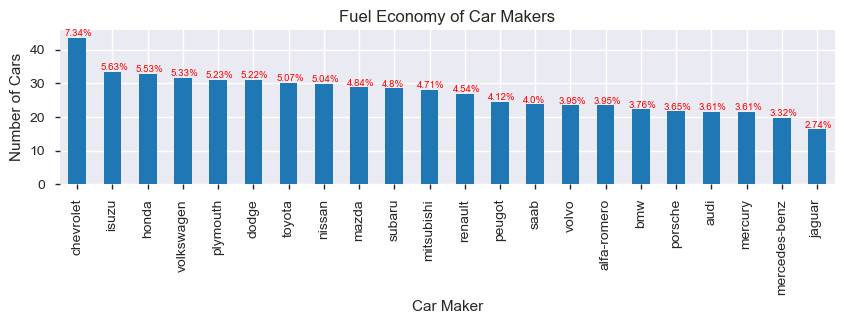

In [43]:
fig = plt.figure()
mileage=automobile_data.groupby(['make']).mean()
mileage['avg-mpg']=((mileage['city-mpg']+mileage['highway-mpg'])/2)
ax=mileage['avg-mpg'].sort_values(ascending=False).plot.bar(figsize=(10,2))
text_on_bars(ax,[],-0.1,7) #ax,  total,  adjust,  fsize
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker')
plt.ylabel('Number of Cars')
plt.title('Fuel Economy of Car Makers')
plt.savefig('6.3.3.2. Name the brands that has the best and the least fuel economy.jpg', dpi=300, bbox_inches='tight')
plt.show()

Brand that has **best** fuel economy is **Chevrolet** and the brand which gives **least** fuel economy is **Jaguar**.

<a id=section6333></a>
#### 6.3.3.3. Which drive wheels type has the best city and highway mileages

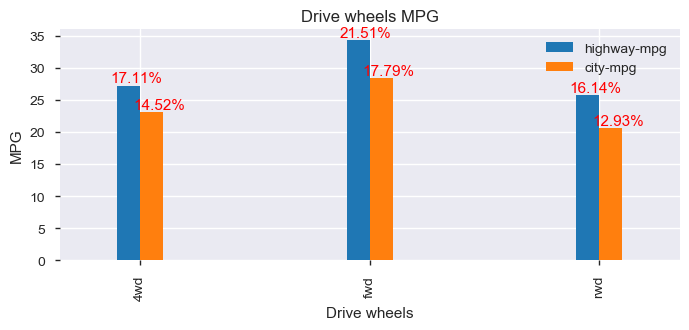

In [44]:
ax = automobile_data.groupby('drive-wheels')[['highway-mpg','city-mpg']].mean().plot(kind='bar', figsize=(8,3),width=0.2)
text_on_bars(ax,[],-0.03,11) #ax,  total,  adjust,  fsize
plt.title("Drive wheels MPG")
plt.ylabel('MPG')
plt.xlabel('Drive wheels');
plt.savefig('6.3.3.3. Which drive wheels type has the best city and highway mileages.jpg', dpi=300, bbox_inches='tight')

**Forward drive wheels(fwd)** is giving the best mileage in both city and highway.

<a id=section6334></a>
#### 6.3.3.4. What is the effect of curb-wight on mileage in both city and highway scenarios?

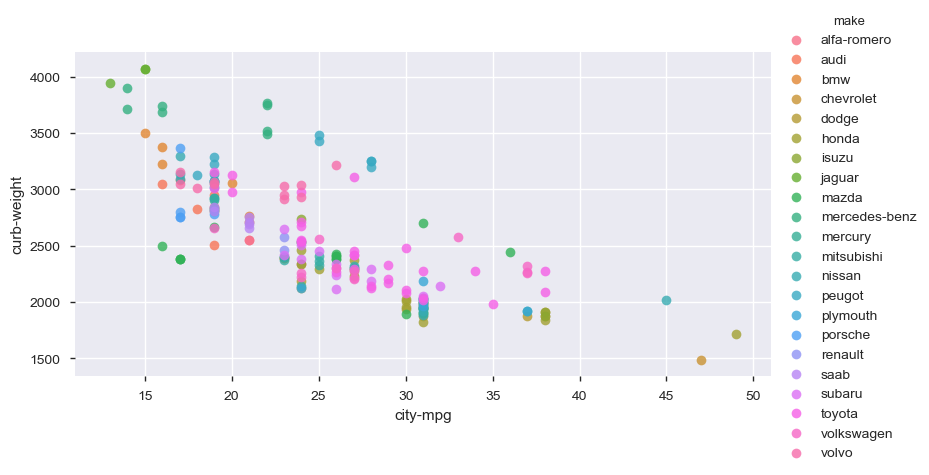

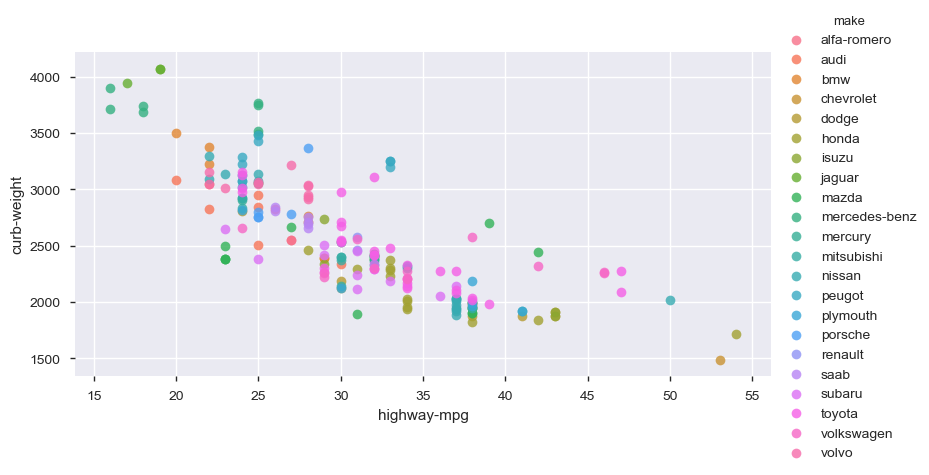

In [45]:
sns.lmplot('city-mpg', 'curb-weight', data=automobile_data, hue="make", fit_reg=False, height=4, aspect=2)
sns.lmplot('highway-mpg',"curb-weight", automobile_data, hue="make",fit_reg=False, height=4, aspect=2)
plt.savefig('6.3.3.4. What is the effect of curb-wight on mileage in both city and highway scenarios.jpg', dpi=300, bbox_inches='tight')

From the above two plots it is evident that, the Curb weight is inversely proportional to both city and highway mileages. i.e. **mileage decreases with the increase in curb weight**.

<a id=section634></a>
#### 6.3.4. Analysis based on engine & dimensions

<a id=section6341></a>
#### 6.3.4.1. How does horsepower is related to no. of cylinders?

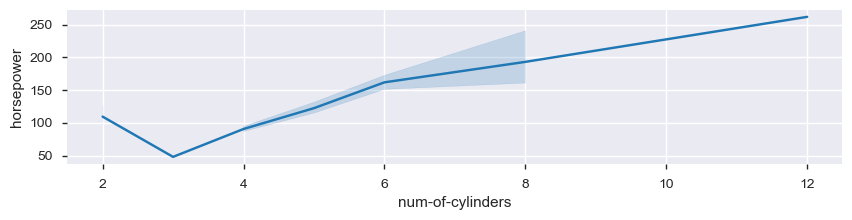

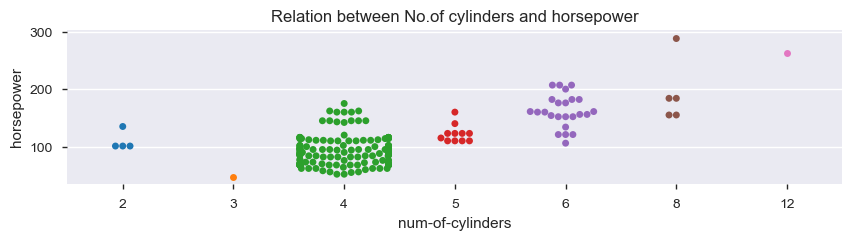

In [46]:
plt.figure(figsize=(10,2))
sns.lineplot(y='horsepower',x='num-of-cylinders',data=automobile_data)
plt.savefig('6.3.4.1. How does horsepower is related to no. of cylinders1.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(10,2))
sns.swarmplot("num-of-cylinders",'horsepower', data=automobile_data)
plt.title('Relation between No.of cylinders and horsepower')
plt.savefig('6.3.4.1. How does horsepower is related to no. of cylinders2.jpg', dpi=300, bbox_inches='tight')
plt.show()

As the number of cylinders **increases**, horsepower also **increases**. We can see that the range of power output from 8 cylinder engine is very high. It seems, engines with higher number of cylinders can give a bigger range of power output. But for 10 and 12 there are very less number of samples are there. so, there it is not showing range of power output.

<a id=section6342></a>
#### 6.3.4.2. What is the effect of curb-weight on engine size?

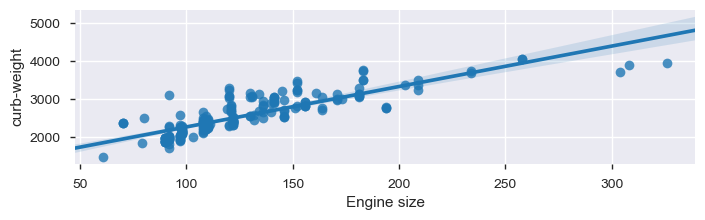

In [47]:
plt.figure(figsize=(8,2))
ax = sns.regplot(x='engine-size', y='curb-weight', data=automobile_data)
plt.xlabel('Engine size')
plt.ylabel('curb-weight');
plt.savefig('6.3.4.2. What is the effect of curb-weight on engine size.jpg', dpi=300, bbox_inches='tight')

As the engine size is **increasing**, curb-weight is also <b>increasing</b> and both are **strongly** correlated.

<a id=section6343></a>
#### 6.3.4.3. Which engine type is giving more mileage in the city and what is the type of the fuel it uses.</h4>

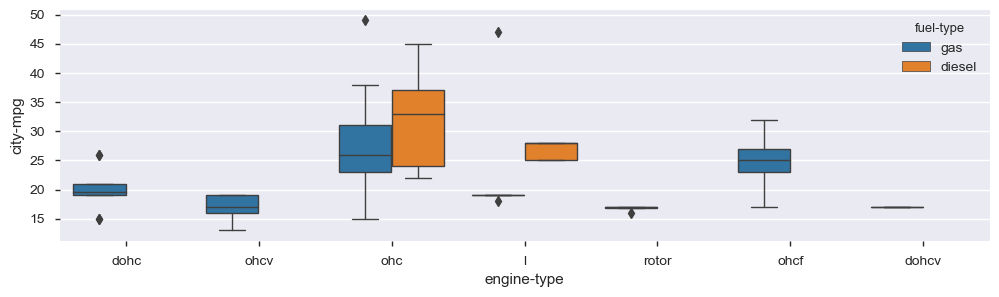

In [48]:
plt.figure(figsize=(12,3))
sns.boxplot(automobile_data['engine-type'], automobile_data['city-mpg'], hue=automobile_data['fuel-type'],linewidth=1)
plt.savefig('6.3.4.3. Which engine type is giving more mileage in the city and what is the type of the fuel it uses.jpg', dpi=300, bbox_inches='tight')

**Ohc** type engine is giving more mileage in the city and the fuel type is **diesel**.

<a id=section6344></a>
#### 6.3.4.4. Classify the cars based on it's body size.

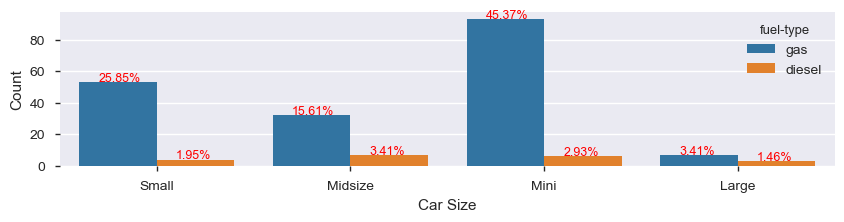

In [49]:
plt.figure(figsize=(10,2))
ax = sns.countplot(automobile_data["sizegroup"], hue=automobile_data['fuel-type'])
text_on_bars(ax,[],0.1,9) #ax,  total,  adjust,  fsize
ax.set_ylabel('Count')
ax.set_xlabel('Car Size')
plt.savefig('6.3.4.4. Classify the cars based on its body size.jpg', dpi=300, bbox_inches='tight')

**Observations:**

- Most of the cars belongs to **Mini** size and majority of them are using gas as fuel.

- **Midsize** segment vehicles has more number of diesel cars.

<a id=section635></a>
#### 6.3.5. Analysis based on efficiency parameters

##### 1. Power-to-weight 

The higher the number, the better your car is going to be in terms of performance.

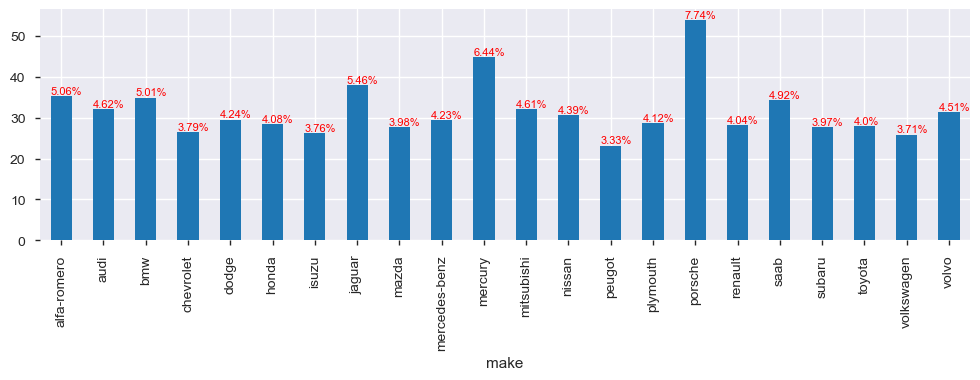

In [50]:
plt.figure(figsize=(12,3))
automobile_data['power2weight'] = (automobile_data['horsepower']/0.001341) / automobile_data['curb-weight']
ax = automobile_data.groupby('make')['power2weight'].mean().plot(kind='bar')
text_on_bars(ax,[],0,8)
plt.savefig('1. Power-to-weight.jpg', dpi=300, bbox_inches='tight')

**porsche (7.74%)** is having better performance than the other vehicles as it is having maximum percentage of cars with high value of power-to-weight ratio. Least is **peugot (3.33%)**.

<br>

##### 2. Stroke-to-bore  

As the stroke-length is short, the piston has to travel a shorter distance. Hence, this design tends to produce higher engine speed and is typically used in high-speed cars & bikes.

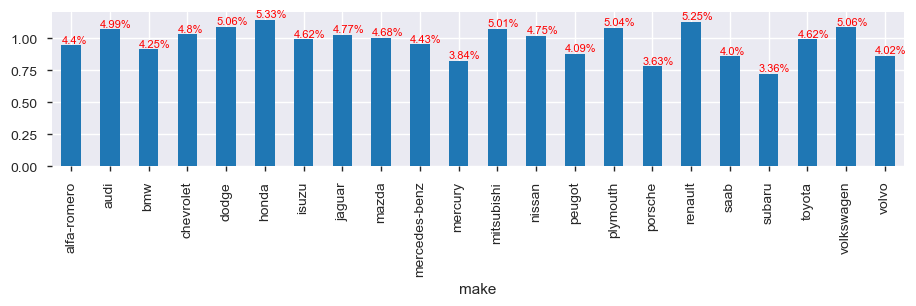

In [51]:
plt.figure(figsize=(11,2))
automobile_data['stroke2bore'] = automobile_data['stroke']/automobile_data['bore']
ax = automobile_data.groupby('make')['stroke2bore'].mean().plot(kind='bar')
totals = []
for i in ax.patches:                                            # find the values and append to list
    totals.append(i.get_height())
total = sum(totals)                                             # set individual bar lables using above list

for i in ax.patches:                                            # set individual bar lables using above list
    ax.text(i.get_x(), i.get_height()+0.02, \
        str(round((i.get_height()/total)*100, 2))+'%', fontsize=8,
            color='red')

plt.savefig('2. Stroke-to-bore.jpg', dpi=300, bbox_inches='tight')

**subaru (3.36%)** has the best performance interms of stroke-to-bore ratio as it is having least percentage of stroke-to-bore ratio. Least is **honda (5.33%)**.

<a id=section636></a>
#### 6.3.6. Analysis of risk

In [52]:
#Create two broad categories - Risky and Safe
def categ_risk(x):
    if (x > 0):
        return 'risky'
    return 'safe'

def categ_risk_binary(x):
    if (x > 0):
        return 1
    return 0
    
automobile_data['isrisky'] = automobile_data['symboling'].apply(lambda x: categ_risk(x))
automobile_data['isrisky10'] = automobile_data['symboling'].apply(lambda x: categ_risk_binary(x))

<a id=section6361></a>
##### 6.3.6.1. Analysis of Central tendencies of Symboling

In [53]:
riskgrpcnt = automobile_data.groupby('isrisky').size().reset_index()
riskgrpcnt.columns=['RiskCategory','VehicleCount']
#riskgrpcnt
riskgrpmode = automobile_data.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
riskgrpmode.columns=['RiskCategory','SymbolingMode']
#riskgrpmode
riskgrpmodecnt = automobile_data.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[1][0]).reset_index()
riskgrpmodecnt.columns=['RiskCategory','ModeCount']
#riskgrpmodecnt
riskgrpmedian = automobile_data.groupby('isrisky')['symboling'].median().reset_index()
riskgrpmedian.columns=['RiskCategory','SymbolingMedian']
#riskgrpmedian

riskmodejoin = riskgrpcnt.merge(riskgrpmedian, how="inner", left_on="RiskCategory", right_on="RiskCategory", suffixes=['', '_right'])
riskmodejoin = riskmodejoin.merge(riskgrpmode, how='inner',left_on="RiskCategory", right_on="RiskCategory", suffixes=['', '_right'])
riskmodejoin = riskmodejoin.merge(riskgrpmodecnt, how="inner", left_on="RiskCategory", right_on="RiskCategory", suffixes=['', '_right'])

display(riskmodejoin)

RiskCategory  VehicleCount  SymbolingMedian  SymbolingMode  ModeCount
0  risky        113           2                1              54       
1  safe         92            0                0              67

Safe vehicles have their risk symbol clearly below 0, while risky vehicles are marked upwards of 0.

<a id=section6362></a>
##### 6.3.6.2. Which body styles are most risk prone?

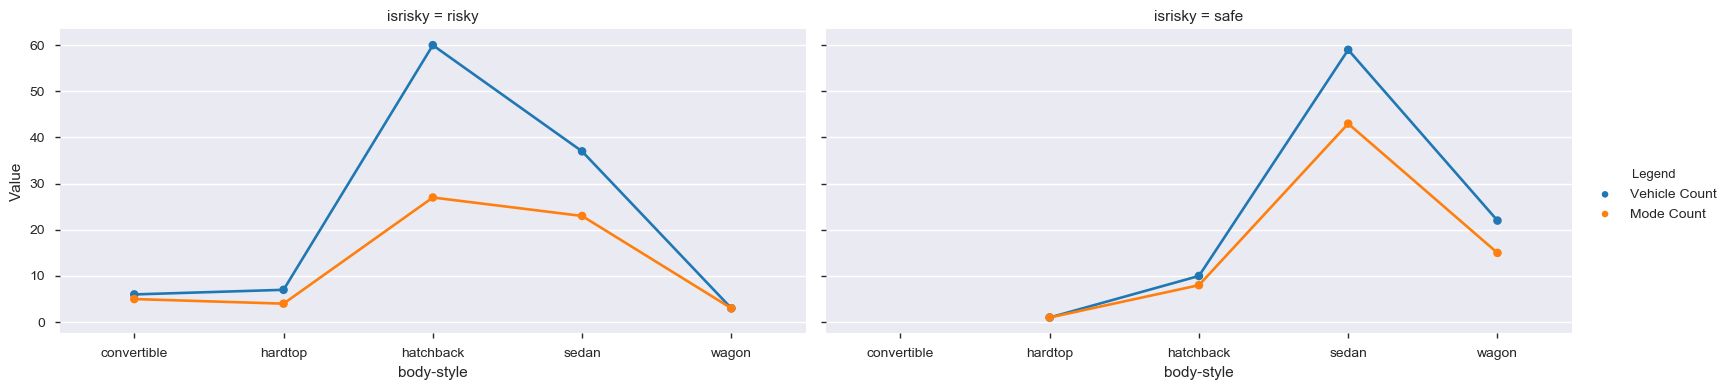

In [54]:
bsriskmedian = automobile_data.groupby(['body-style','isrisky'])['symboling'].median().reset_index()
bsriskmedian['Legend'] = 'Median'
bsriskmedian.columns =  ['body-style','isrisky','Value', 'Legend']
#print(bsriskmedian)

bsriskmode = automobile_data.groupby(['body-style','isrisky'])['symboling'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
bsriskmode['Legend'] = 'Mode'
bsriskmode.columns = ['body-style','isrisky','Value', 'Legend']
#print(bsriskmode)

bsriskcount = automobile_data.groupby(['body-style','isrisky'])['symboling'].count().reset_index()
bsriskcount['Legend'] = 'Vehicle Count'
bsriskcount.columns=['body-style','isrisky','Value', 'Legend']
#print(bsriskcount)

bsriskmodecount = automobile_data.groupby(['body-style','isrisky'])['symboling'].apply(lambda sym: stats.mode(sym)[1][0]).reset_index()
bsriskmodecount['Legend'] = 'Mode Count'
bsriskmodecount.columns=['body-style','isrisky','Value', 'Legend']
#print(bsriskmodecount)

bsriskcentraltend = bsriskmedian.append(bsriskmode, ignore_index=False, verify_integrity=False, sort=False)
bsriskcounts = bsriskcount.append(bsriskmodecount,ignore_index=False, verify_integrity=False, sort=False)

sns.factorplot(x="body-style",y="Value", hue="Legend", col="isrisky", data =bsriskcounts, scale = 0.6, height=4,aspect=2)
plt.savefig('6.3.6.2. Which body styles are most risk prone.jpg', dpi=300, bbox_inches='tight')

So this clearly shows that convertibles and hardtops are riskier compared to sedans and wagons. Hatchbacks on the other hand does not show a clear trend with respect to risk.

<a id=section6363></a>
##### 6.3.6.3. Factors contributing to risk.

<a id=section6363a></a>
###### a. Wheel Base

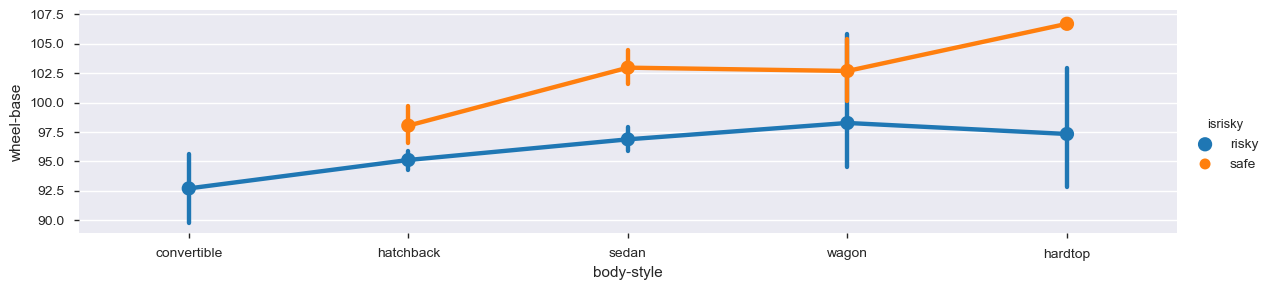

In [55]:
ax = sns.factorplot(x="body-style",y="wheel-base", data=automobile_data, hue="isrisky",height=3,aspect=4)
plt.savefig('6.3.6.3.a. Wheel Base.jpg', dpi=300, bbox_inches='tight')

Within each body style, risky vehicles has lesser wheel bases compared to riskier ones. Conertibles and hardtops has significantly less wheel base compared to other body styles.

<a id=section6363b></a>
###### b. Height

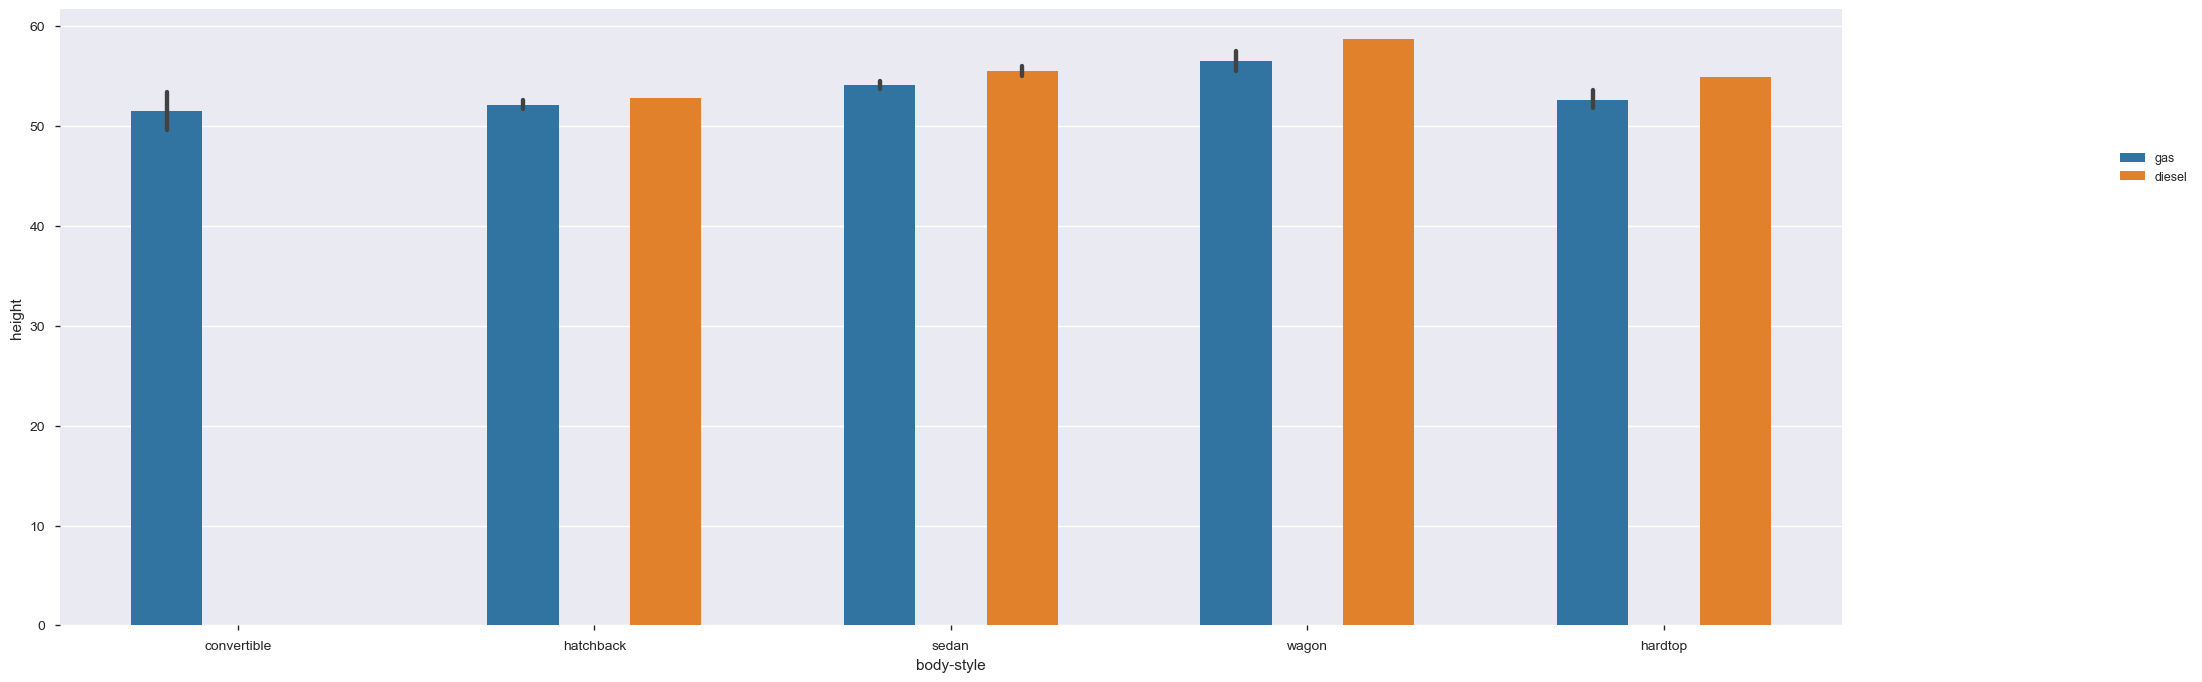

In [56]:
def change_width(ax,new_value):                             # function for changing width of the bars
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)
        
ax = sns.barplot(automobile_data["body-style"], automobile_data['height'], hue=automobile_data['fuel-type'])
change_width(ax,0.2)
plt.legend(bbox_to_anchor=(1.2, 0.7), loc='lower right', fontsize=9)
plt.savefig('6.3.6.3.b. Height.jpg', dpi=300, bbox_inches='tight')

As the height of the vehicle reduces, ingress and egress becomes increasingly difficult for passengers. Here wagons have the maximum height for both the fuel types.

<a id=section6363c></a>
###### c. comparision of risk due to Wheel Base & Height.

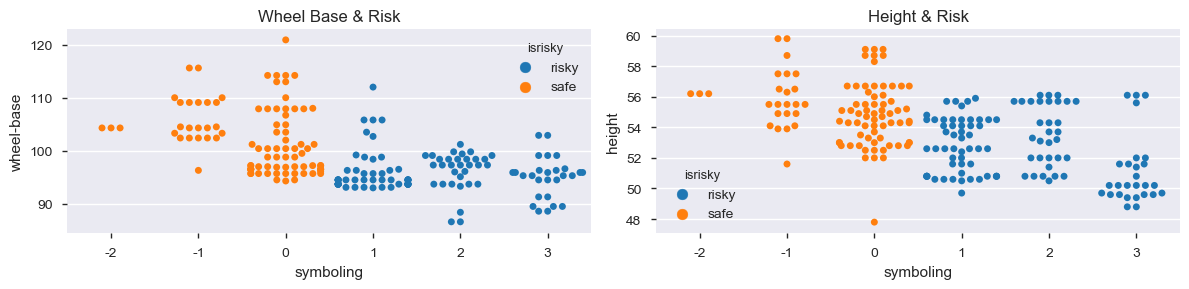

In [57]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.swarmplot(x="symboling", y="wheel-base",data = automobile_data, hue="isrisky")
plt.title("Wheel Base & Risk")
plt.subplot(122)
sns.swarmplot(x="symboling", y="height",data = automobile_data, hue="isrisky")
plt.title("Height & Risk")

plt.tight_layout()
plt.savefig('6.3.6.3.c. comparision of risk due to Wheel Base & Height.jpg', dpi=300, bbox_inches='tight')
plt.show()

**Observations:**

- Safer vehicles within each bodystyle are lengthier than riskier ones. They have longer wheel bases.

- Reduction in vehicle height reduces the center of graity of the car and hence improved stability especially while doing high speed cornerings. So, when a manufacturer reduces the height of a car, they are clearly aiming the product for car enthusiasts and not for regular commuters.

<a id=section6363d></a>
###### d. Number of doors

A two door car is meant to be a driver's car, while a four door one is meant for more passengers. They are meant for regular commute than performance driving. We can safely assume they carry around families more often compared to a two door car.

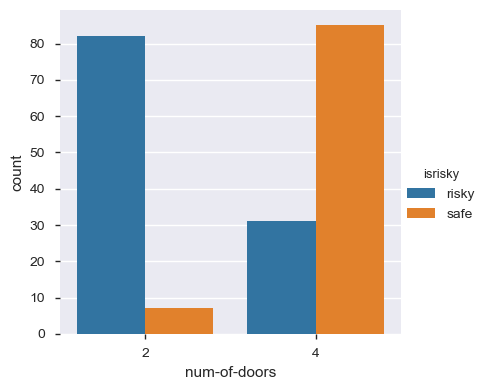

In [58]:
sns.factorplot(x="num-of-doors", data=automobile_data, hue="isrisky", kind="count", size=4)
plt.savefig('6.3.6.3.d. Number of doors.jpg', dpi=300, bbox_inches='tight')

**Number of doors does not determine the risk factor of a car directly**. Haing 4 doors does not ensure a place in the safe category, but then, we can see that safer cars are always found among 4 door category.

<a id=section64></a>
### 6.4. Correlation Analysis

It is a measure of the extent of interdependence between variables. In other words, when we look at two variables over time, if one variable changes, how does this effect change in the other variable?

For example, smoking is known to be correlated to lung cancer, since you have a higher chance of getting lung cancer if you smoke.

It is important to know that correlation doesn’t imply causation.

**Pearson Correlation:**

- The Pearson Correlation measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:
    
    - 1: total positive linear correlation,
    - 0: no linear correlation, the two variables most likely do not affect each other
    - -1: total negative linear correlation.
    

- The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.


- By convention, the p-value are interpreted as follows:
    - **< 0.001** - strong evidence that the correlation is significant,
    - **< 0.05**  - there is moderate evidence that the correlation is significant,
    - **< 0.1**   - weak evidence that the correlation is significant, and
    - **> 0.1**   - no evidence that the correlation is significant.


- Pearson Correlation is the default method of the function “corr”


- Now we'll see how to calculate correlation of **price** with **wheel-base** and **width** to see how pearson correlation works.


In [59]:
import scipy.stats as stats
pearson_coeff, p_value = stats.pearsonr(automobile_data['wheel-base'],automobile_data['price'])
print('price vs wheel-base    correlation coefficient is',pearson_coeff,'   p-value is',p_value)
pearson_coeff, p_value = stats.pearsonr(automobile_data['width'],automobile_data['price'])
print('price vs width         correlation coefficient is',pearson_coeff,'  p-value is',p_value)

price vs wheel-base    correlation coefficient is 0.584846838972225    p-value is 3.338017082369928e-20
price vs width         correlation coefficient is 0.7245583242779026   p-value is 1.1789696449955338e-34


Since the p-value for both the attributes is < 0.001, the correlation between wheel-base and price is statistically significant. The linear relationship for wheel-base isn’t extremely strong (\~0.585) but it is quite strong (\~0.751) for width. 

<a id=section641></a>
#### 6.4.1. Using heatmap

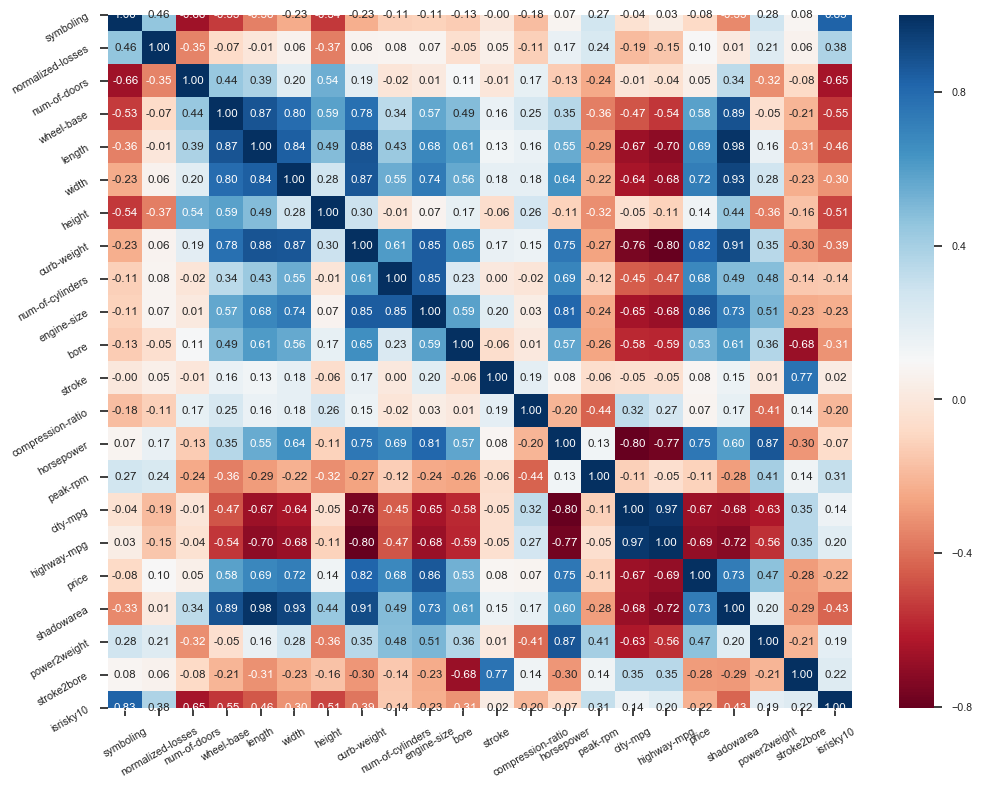

In [60]:
corr = automobile_data.corr()
sns.set_context("notebook", font_scale=0.7, rc={"lines.linewidth":3.5})
plt.figure(figsize=(12,9))
a = sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=30)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.savefig('6.4.1. Using heatmap.jpg', dpi=300, bbox_inches='tight')

**Observations:**

- In the above map, we've to see the locations where the value(correlation coefficient) is more.<br><br>

    - Price is more correlated with engine size and curb weight of the car.<br>
    - Curb weight is mostly correlated with engine size, length, width and wheel-base which is expected as these adds up the weight of the car.<br>
    - Wheel base is highly correlated with length and curb-weight of the car.<br>
    - Symboling and normalized car are correlated than the other fields.<br>



<a id=section642></a>
#### 6.4.2. Using Pairplot

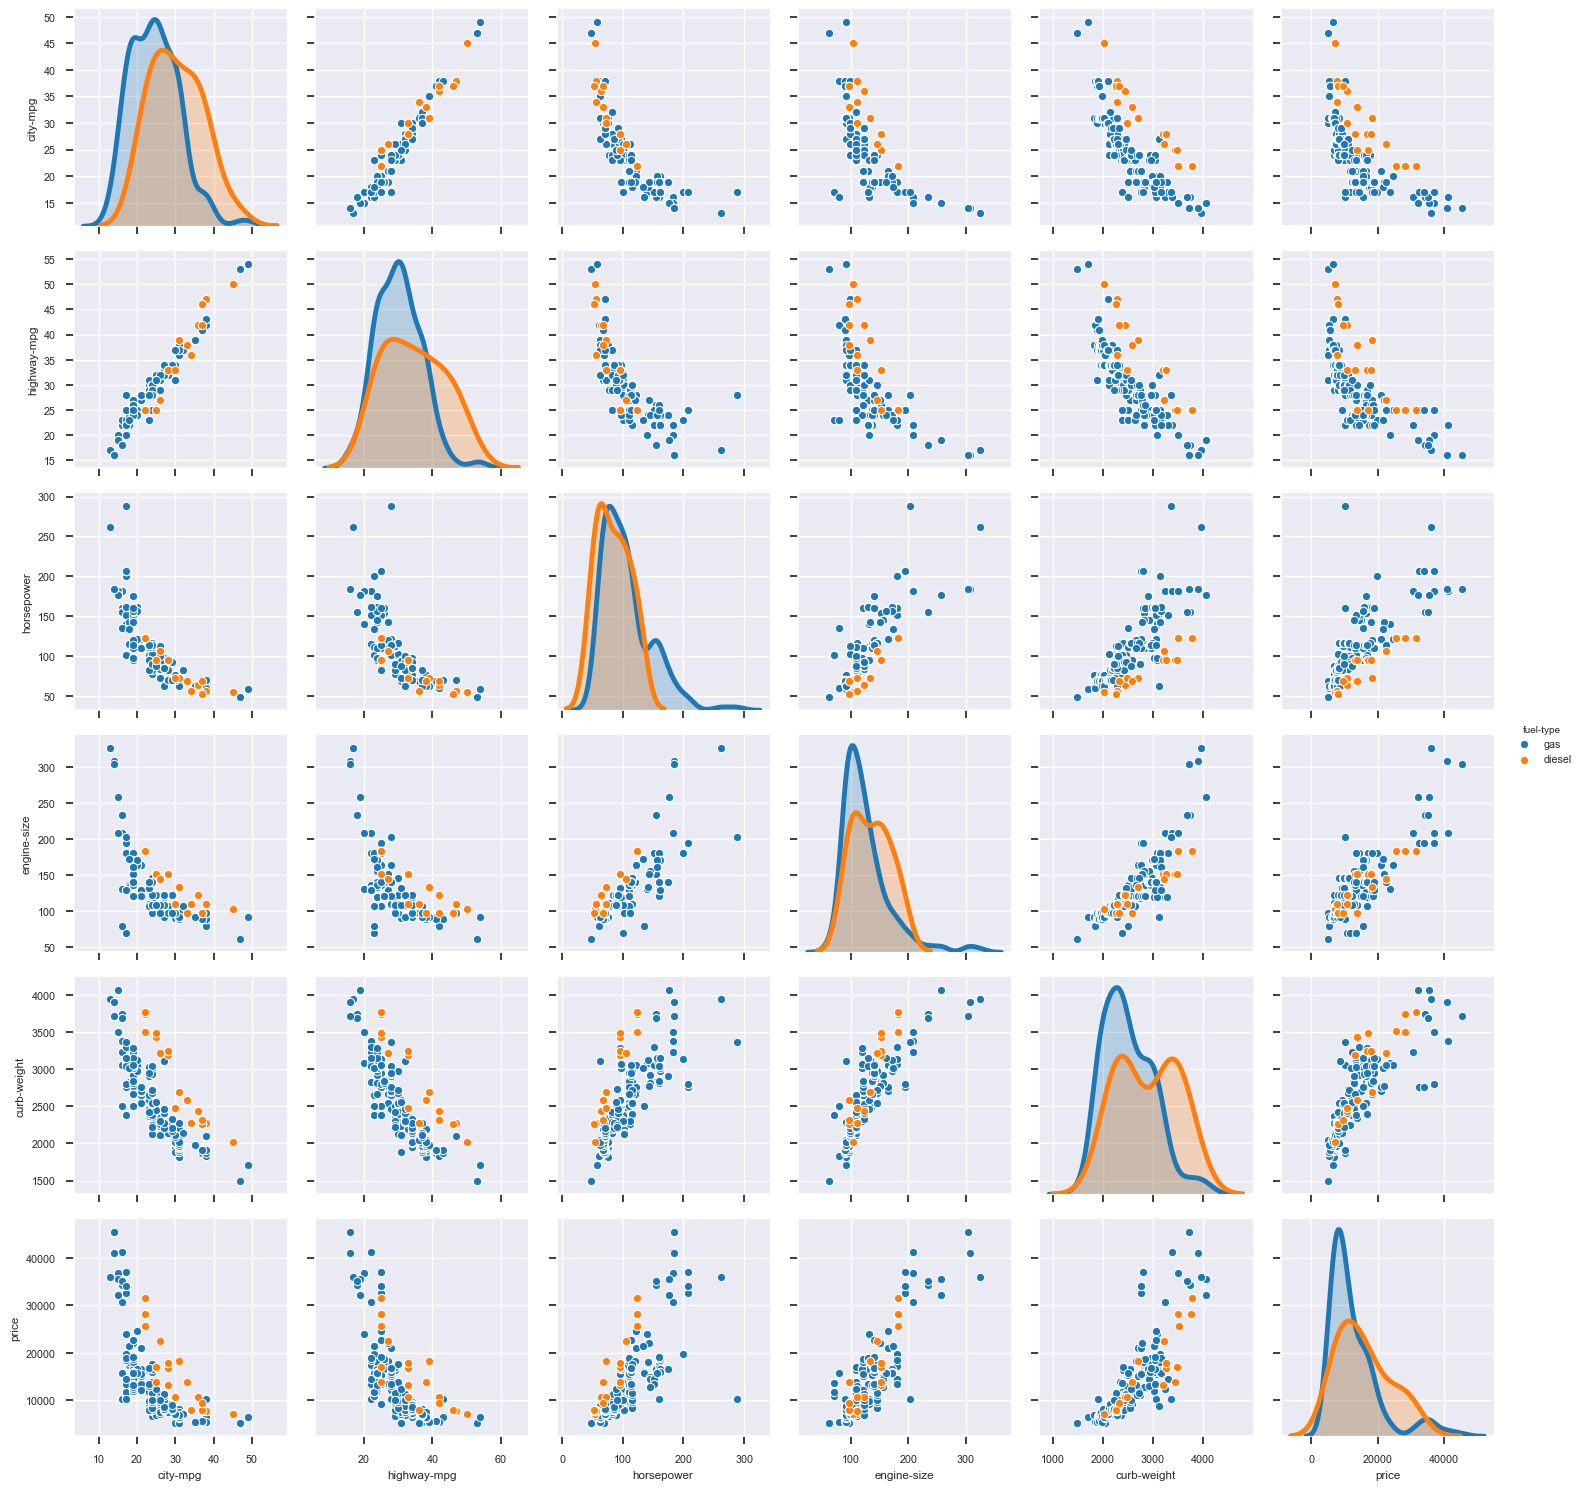

In [61]:
sns.pairplot(automobile_data[["city-mpg", 'highway-mpg', "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="kde")
plt.savefig('6.4.2. Using Pairplot.jpg', dpi=300, bbox_inches='tight')

**Observations:**

- Vehicle **Mileage** is **inversely proportional to Horsepower, engine-size and Curb Weight.**

- Horsepower increases, with the increase in engine size.

- There is a **strong** correlation exists between **curb weight and engine size** as Curbweight increases with the increase in **Engine Size** or **horse power**.

- Vehicle with **high price have low mileage**.This because high priced vehicles go into luxary segment which are meant for high performance and running cost is not very important in this segment.

- As the engine power(horse power) increases, the vehicle price also **increases**. More horse power also means bigger engine size.

- High **curb weight increases price** of the vehicle and **decreases** the **mileage** of the vehicle.

<a id=section7></a>
### 7. Conclusion

- It is analyzed that the attributes in automobile dataset are categorized as **basic**, **engine**, **dimension** and **fuel & efficiency** and based on this different chart are plotted.

- The **price** of the vehicle is **mostly dependent** on **engine-size, horsepower, curb-wight, stroke, wheel-base, length, width, num-of cylinders and bore**.

- **city-mpg** and **highway-mpg** are **strongly** correlated. Further in ML modelling, we'll use **city-mpg** as a realistic figure.

- The most important inference drawn from all this analysis is, I get to know what are the features on which price is highly positively and negatively coorelated with.

- This analysis will help me to choose which machine learning model we can apply to predict price of test dataset in later terms and projects.

- Now have to move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model’s prediction performance. We just end up here with the basic pre-processing and data analysis.